## Telecom Churn Case Study

### Business Problem Overview
In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

 

For many incumbent operators, retaining high profitable customers is the number one business goal.

 

To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

 

In this project, you will analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.

 

In [1]:
import os
import sys
import pandas as pd
pd.set_option('display.max_columns', 500)
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,KFold
from sklearn.preprocessing import MinMaxScaler,StandardScaler,LabelEncoder,OneHotEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,classification_report,f1_score,roc_auc_score,roc_curve
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from sklearn.decomposition import PCA,IncrementalPCA
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

Using TensorFlow backend.
C:\Users\Admin\Anaconda3\lib\site-packages\tensorflow-2.0.0b1-py3.7-win-amd64.egg\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Admin\Anaconda3\lib\site-packages\tensorflow-2.0.0b1-py3.7-win-amd64.egg\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Admin\Anaconda3\lib\site-packages\tensorflow-2.0.0b1-py3.7-win-amd64.egg\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 =

#### Reading the data from csv

In [2]:
churn = pd.read_csv(r'telecom_churn_data.csv')

#### Its better to not perform any operation on the actual data

In [3]:
t_churn = churn

#### Doing basic checks on the dataset

In [4]:
t_churn.shape

(99999, 226)

In [5]:
t_churn.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [6]:
t_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [7]:
t_churn.columns

Index(['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou',
       'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7',
       'last_date_of_month_8', 'last_date_of_month_9', 'arpu_6',
       ...
       'sachet_3g_9', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9',
       'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g'],
      dtype='object', length=226)

In [8]:
t_churn.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621

#### Checking the null values present in the dataset

In [9]:
round(t_churn.isnull().sum()/len(t_churn.index),3).sort_values(ascending=False)

night_pck_user_6            0.748
max_rech_data_6             0.748
count_rech_2g_6             0.748
arpu_2g_6                   0.748
count_rech_3g_6             0.748
fb_user_6                   0.748
arpu_3g_6                   0.748
date_of_last_rech_data_6    0.748
av_rech_amt_data_6          0.748
total_rech_data_6           0.748
total_rech_data_7           0.744
arpu_2g_7                   0.744
arpu_3g_7                   0.744
date_of_last_rech_data_7    0.744
max_rech_data_7             0.744
night_pck_user_7            0.744
av_rech_amt_data_7          0.744
count_rech_3g_7             0.744
fb_user_7                   0.744
count_rech_2g_7             0.744
date_of_last_rech_data_9    0.741
count_rech_3g_9             0.741
arpu_3g_9                   0.741
count_rech_2g_9             0.741
max_rech_data_9             0.741
arpu_2g_9                   0.741
av_rech_amt_data_9          0.741
total_rech_data_9           0.741
fb_user_9                   0.741
night_pck_user

#### Lets focus on the data related to recharge amount for 6,7,8,9 months

In [10]:
recharge_amt_col = t_churn.columns[t_churn.columns.str.contains('rech_amt|rech_data')]
t_churn[recharge_amt_col].describe()

,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9
count,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.00000,25153.000000,25571.000000,26339.000000,25922.000000
mean,327.514615,322.962970,324.157122,303.345673,104.637486,104.752398,107.728207,101.943889,2.463802,2.666419,2.651999,2.441170,126.393392,126.729459,125.717301,124.94144,192.600982,200.981292,197.526489,192.734315
std,398.019701,408.114237,416.540455,404.588583,120.614894,124.523970,126.902505,125.375109,2.789128,3.031593,3.074987,2.516339,108.477235,109.765267,109.437851,111.36376,192.646318,196.791224,191.301305,188.400286
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,0.500000,0.500000,1.000000
25%,109.000000,100.000000,90.000000,52.000000,30.000000,30.000000,30.000000,28.000000,1.000000,1.000000,1.000000,1.000000,25.000000,25.000000,25.000000,25.00000,82.000000,92.000000,87.000000,69.000000
50%,230.000000,220.000000,225.000000,200.000000,110.000000,110.000000,98.000000,61.000000,1.000000,1.000000,1.000000,2.000000,145.000000,145.000000,145.000000,145.00000,154.000000,154.000000,154.000000,164.000000
75%,437.500000,428.000000,434.500000,415.000000,120.000000,128.000000,144.000000,144.000000,3.000000,3.000000,3.000000,3.000000,177.000000,177.000000,179.000000,179.00000,252.000000,252.000000,252.000000,252.000000
max,35190.000000,40335.000000,45320.000000,37235.000000,4010.000000,4010.000000,4449.000000,3399.000000,61.000000,54.000000,60.000000,84.000000,1555.000000,1555.000000,1555.000000,1555.00000,7546.000000,4365.000000,4076.000000,4061.000000


#### Lets check the null values present in the recharge columns

In [11]:
round(t_churn[recharge_amt_col].isnull().sum()/len(t_churn[recharge_amt_col].index),2)

total_rech_amt_6            0.00
total_rech_amt_7            0.00
total_rech_amt_8            0.00
total_rech_amt_9            0.00
max_rech_amt_6              0.00
max_rech_amt_7              0.00
max_rech_amt_8              0.00
max_rech_amt_9              0.00
date_of_last_rech_data_6    0.75
date_of_last_rech_data_7    0.74
date_of_last_rech_data_8    0.74
date_of_last_rech_data_9    0.74
total_rech_data_6           0.75
total_rech_data_7           0.74
total_rech_data_8           0.74
total_rech_data_9           0.74
max_rech_data_6             0.75
max_rech_data_7             0.74
max_rech_data_8             0.74
max_rech_data_9             0.74
av_rech_amt_data_6          0.75
av_rech_amt_data_7          0.74
av_rech_amt_data_8          0.74
av_rech_amt_data_9          0.74
dtype: float64

#### We can see from the above the the(date_of_last_rech_data,total_rech_data,max_rech_data,av_rech_amt_data) consist of heavy null values

#### For the inconsisency check in the amount column we can assume that if total_recharge column is null then the other amount column also should be null

In [12]:
print(t_churn.loc[t_churn['av_rech_amt_data_6'].isnull(),['total_rech_data_6','max_rech_data_6']].sum())
print(t_churn.loc[t_churn['av_rech_amt_data_7'].isnull(),['total_rech_data_7','max_rech_data_7']].sum())
print(t_churn.loc[t_churn['av_rech_amt_data_8'].isnull(),['total_rech_data_8','max_rech_data_8']].sum())
print(t_churn.loc[t_churn['av_rech_amt_data_9'].isnull(),['total_rech_data_9','max_rech_data_9']].sum())

total_rech_data_6    0.0
max_rech_data_6      0.0
dtype: float64
total_rech_data_7    0.0
max_rech_data_7      0.0
dtype: float64
total_rech_data_8    0.0
max_rech_data_8      0.0
dtype: float64
total_rech_data_9    0.0
max_rech_data_9      0.0
dtype: float64


#### We can see the data is consistent for the recharge columns

#### As we are going to work with the 6,7 and 8th month so i am relacing the NaN columns for the amount woth 0

In [13]:
t_churn.loc[:,['total_rech_data_6','av_rech_amt_data_6','max_rech_data_6']] = t_churn.loc[:,['total_rech_data_6','av_rech_amt_data_6','max_rech_data_6']].replace(np.NaN,0)
t_churn.loc[:,['total_rech_data_7','av_rech_amt_data_7','max_rech_data_7']] = t_churn.loc[:,['total_rech_data_7','av_rech_amt_data_7','max_rech_data_7']].replace(np.NaN,0)
t_churn.loc[:,['total_rech_data_8','av_rech_amt_data_8','max_rech_data_8']] = t_churn.loc[:,['total_rech_data_8','av_rech_amt_data_8','max_rech_data_8']].replace(np.NaN,0,)

In [14]:
# Lets check the columns for the canges
t_churn[['total_rech_data_6','av_rech_amt_data_6','max_rech_data_6',
        'total_rech_data_7','av_rech_amt_data_7','max_rech_data_7',
        'total_rech_data_8','av_rech_amt_data_8','max_rech_data_8']].head()

,total_rech_data_6,av_rech_amt_data_6,max_rech_data_6,total_rech_data_7,av_rech_amt_data_7,max_rech_data_7,total_rech_data_8,av_rech_amt_data_8,max_rech_data_8
0,1.0,252.0,252.0,1.0,252.0,252.0,1.0,252.0,252.0
1,0.0,0.0,0.0,1.0,154.0,154.0,2.0,50.0,25.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,56.0,56.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Now lets derive total recharge amount for month 6,7,8

In [15]:
t_churn['tot_rech_amt_data_6'] = t_churn['total_rech_data_6'] * t_churn['av_rech_amt_data_6']
t_churn['tot_rech_amt_data_7'] = t_churn['total_rech_data_7'] * t_churn['av_rech_amt_data_7']
t_churn['tot_rech_amt_data_8'] = t_churn['total_rech_data_8'] * t_churn['av_rech_amt_data_8']

In [16]:
# Lets view the data 
t_churn[['tot_rech_amt_data_6','tot_rech_amt_data_7','tot_rech_amt_data_8']].head()

,tot_rech_amt_data_6,tot_rech_amt_data_7,tot_rech_amt_data_8
0,252.0,252.0,252.0
1,0.0,154.0,100.0
2,0.0,0.0,0.0
3,0.0,0.0,0.0
4,56.0,0.0,0.0


#### Lets create the total average recharge amount for month 6,7

In [17]:
t_churn['total_avg_rech_amnt'] = (t_churn['tot_rech_amt_data_6'] + t_churn['total_rech_amt_6'] + t_churn['tot_rech_amt_data_7'] + t_churn['total_rech_amt_7'])/4

#### Lets define the high value customer

In [18]:
high_val_cust = t_churn.total_avg_rech_amnt >= t_churn.total_avg_rech_amnt.quantile(.70)

In [19]:
high_val_customer = t_churn.loc[high_val_cust,:]
high_val_customer.shape

(30001, 230)

#### We can see that our value is near to 29.9 which is stated in assignment

#### Lets create a column churn which will be filled with 1 if the customer has churned

In [20]:
# Set the initial value of the column as 0 for everyone
high_val_customer['churn'] = 0

#### Now lets filter the high value customer based on the columns
total_ic_mou_9

total_og_mou_9

vol_2g_mb_9

vol_3g_mb_9

In [21]:
churned = ((high_val_customer['total_ic_mou_9']==0) & (high_val_customer['total_og_mou_9']
                                             ==0) & (high_val_customer['vol_2g_mb_9']==0) & (high_val_customer['vol_3g_mb_9']==0))

In [22]:
# Mark the customer as churned
high_val_customer.loc[churned,'churn']=1

In [23]:
# lets check the amount of people are churned
print(high_val_customer.churn.value_counts())


0    27560
1     2441
Name: churn, dtype: int64


Text(0, 0.5, 'Total_Count')

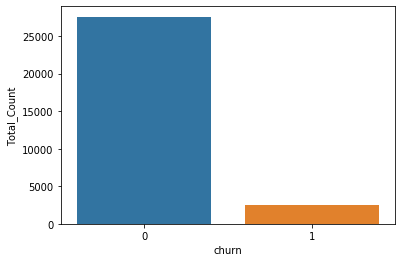

In [24]:
sns.countplot(high_val_customer.churn)
plt.ylabel('Total_Count')

In [25]:
print('percentage of people churned={0}'.format(round(100 * high_val_customer.churn.sum()/len(churned),2)))

percentage of people churned=8.14


#### Now lets drop the columns which are related to the churn phase _9

In [26]:
high_val_customer = high_val_customer.drop(high_val_customer.columns[high_val_customer.columns.str.contains('_9')],axis='columns')

In [27]:
high_val_customer.shape

(30001, 177)

In [28]:
# Lets see the amount of null values in columns
round(high_val_customer.isna().sum()/len(high_val_customer),2).sort_values(ascending=False).head(20)

arpu_2g_8                   0.47
count_rech_2g_8             0.47
count_rech_3g_8             0.47
night_pck_user_8            0.47
date_of_last_rech_data_8    0.47
fb_user_8                   0.47
arpu_3g_8                   0.47
count_rech_3g_6             0.44
count_rech_2g_6             0.44
arpu_3g_6                   0.44
date_of_last_rech_data_6    0.44
fb_user_6                   0.44
night_pck_user_6            0.44
arpu_2g_6                   0.44
count_rech_3g_7             0.43
night_pck_user_7            0.43
fb_user_7                   0.43
arpu_2g_7                   0.43
arpu_3g_7                   0.43
count_rech_2g_7             0.43
dtype: float64

#### Lets plot some graph and analyze the changes happened from 6&7 to 8th month

In [29]:
high_val_customer.columns[high_val_customer.columns.str.contains('rech_amt')]

Index(['total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8',
       'max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8',
       'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8',
       'tot_rech_amt_data_6', 'tot_rech_amt_data_7', 'tot_rech_amt_data_8'],
      dtype='object')

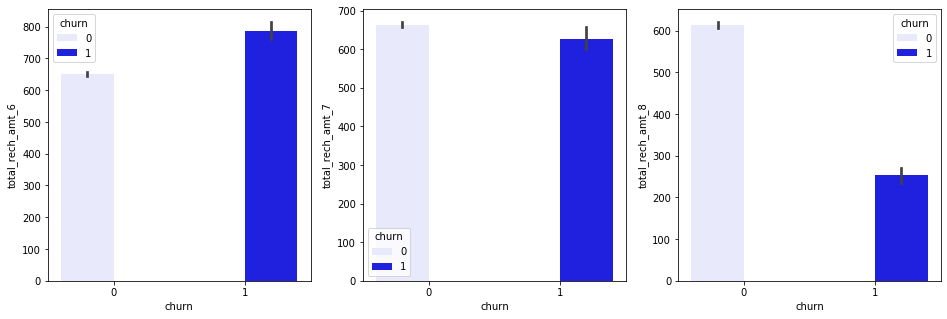

In [30]:
col = ['total_rech_amt_6','total_rech_amt_7','total_rech_amt_8']
plt.figure(figsize=(16,5))
for i,j in enumerate(col):
    plt.subplot(1,3,i+1)
    sns.barplot(x = 'churn',y=j,data=high_val_customer,hue='churn',color='blue')

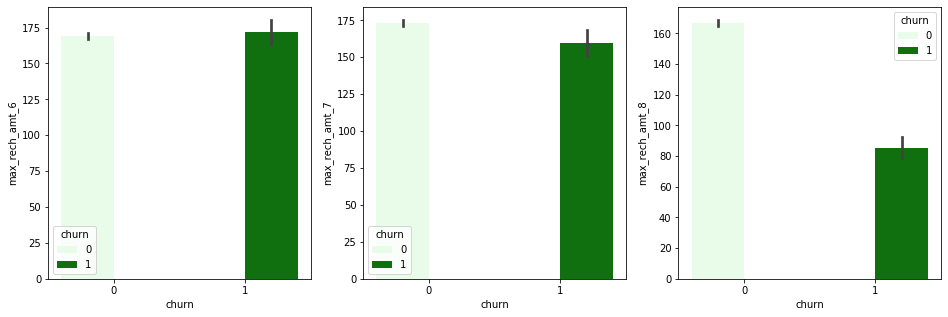

In [31]:
col = ['max_rech_amt_6','max_rech_amt_7','max_rech_amt_8']
plt.figure(figsize=(16,5))
for i,j in enumerate(col):
    plt.subplot(1,3,i+1)
#     clrs = ['red' if (x == min(j)) else 'grey' for x in j ]
    sns.barplot(x = 'churn',y=j,data=high_val_customer,hue='churn',color='green')

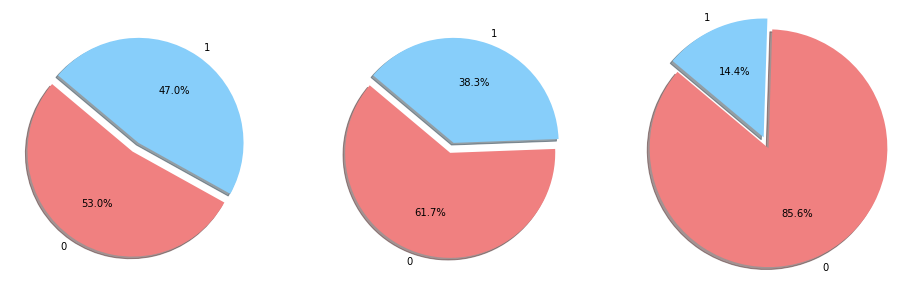

In [32]:
col = ['tot_rech_amt_data_6', 'tot_rech_amt_data_7', 'tot_rech_amt_data_8']
plt.figure(figsize=(16,5))
for i,j in enumerate(col):
    plt.subplot(1,3,i+1)
#     clrs = ['red' if (x == min(j)) else 'grey' for x in j ]
#     sns.barplot(x = 'churn',y=j,data=high_val_customer,hue='churn',color='green')
    labels = list(high_val_customer.groupby('churn')[j].mean().index)
    sizes =list(high_val_customer.groupby('churn')[j].mean().values)
    explode = (0.1, 0)
    colors = ['lightcoral', 'lightskyblue']
    plt.pie(sizes, labels=labels, colors=colors,
    autopct='%1.1f%%', shadow=True, startangle=140,explode=explode)
plt.axis('equal')
plt.show()

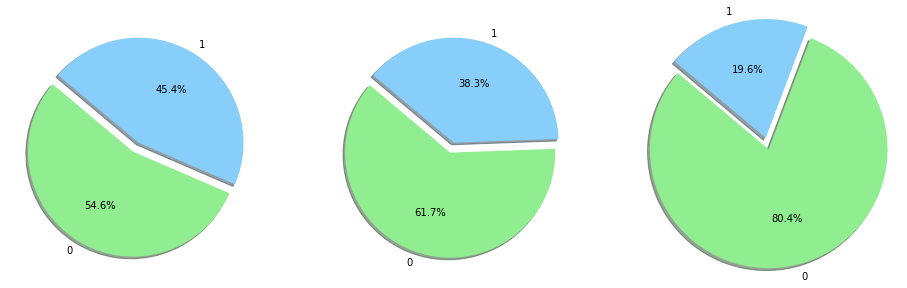

In [33]:
col = ['av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8']
plt.figure(figsize=(16,5))
for i,j in enumerate(col):
    plt.subplot(1,3,i+1)
#     clrs = ['red' if (x == min(j)) else 'grey' for x in j ]
#     sns.barplot(x = 'churn',y=j,data=high_val_customer,hue='churn',color='green')
    labels = list(high_val_customer.groupby('churn')[j].mean().index)
    sizes =list(high_val_customer.groupby('churn')[j].mean().values)
    colors = ['lightgreen', 'lightskyblue']
    explode = (0.1, 0)
    plt.pie(sizes, labels=labels, colors=colors,
    autopct='%1.1f%%', shadow=True, startangle=140,explode=explode)
plt.axis('equal')
plt.show()

#### In all the above graphs we can notice that there is a severe drop from the (6,7) to 8 months for all the metrics for churned customers

#### Lets define few columns for modelling purpose where we want to find out the total amount spend on different metrics

In [34]:
high_val_customer['total_rech_amt_good_phase'] = (high_val_customer.total_rech_amt_6 + high_val_customer.total_rech_amt_7)/2
high_val_customer['total_rech_amt_data_good_phase'] = (high_val_customer.tot_rech_amt_data_6 + high_val_customer.tot_rech_amt_data_7)/2
high_val_customer['max_rech_amt_good_phase'] = (high_val_customer.max_rech_amt_6 + high_val_customer.max_rech_amt_7)/2

#### Now lets find out the numberic columns where there is still null values

In [35]:
high_val_customer[list(high_val_customer.columns[high_val_customer.columns.str.contains('_data_')])].isnull().sum()

date_of_last_rech_data_6          13245
date_of_last_rech_data_7          12944
date_of_last_rech_data_8          14048
total_rech_data_6                     0
total_rech_data_7                     0
total_rech_data_8                     0
max_rech_data_6                       0
max_rech_data_7                       0
max_rech_data_8                       0
av_rech_amt_data_6                    0
av_rech_amt_data_7                    0
av_rech_amt_data_8                    0
tot_rech_amt_data_6                   0
tot_rech_amt_data_7                   0
tot_rech_amt_data_8                   0
total_rech_amt_data_good_phase        0
dtype: int64

In [36]:
high_val_customer[list(high_val_customer.columns[high_val_customer.columns.str.contains('_amt_')])].isnull().sum()

total_rech_amt_6                  0
total_rech_amt_7                  0
total_rech_amt_8                  0
max_rech_amt_6                    0
max_rech_amt_7                    0
max_rech_amt_8                    0
last_day_rch_amt_6                0
last_day_rch_amt_7                0
last_day_rch_amt_8                0
av_rech_amt_data_6                0
av_rech_amt_data_7                0
av_rech_amt_data_8                0
tot_rech_amt_data_6               0
tot_rech_amt_data_7               0
tot_rech_amt_data_8               0
total_rech_amt_good_phase         0
total_rech_amt_data_good_phase    0
max_rech_amt_good_phase           0
dtype: int64

#### We can see that the data and amount columns are not having nulls

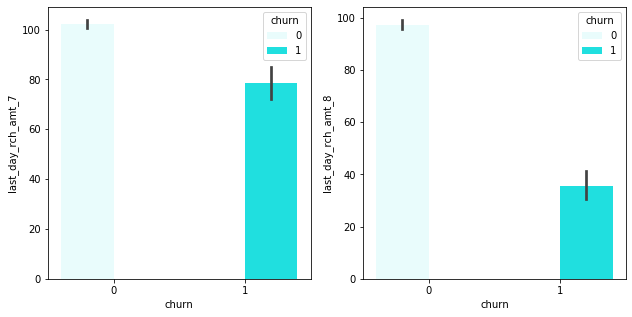

In [37]:
# lets check the rechare done by customer on last date on month 7 and 8

col = ['last_day_rch_amt_7','last_day_rch_amt_8']
plt.figure(figsize=(16,5))
for i,j in enumerate(col):
    plt.subplot(1,3,i+1)
#     clrs = ['red' if (x == min(j)) else 'grey' for x in j ]
    sns.barplot(x = 'churn',y=j,data=high_val_customer,hue='churn',color='cyan')

#### Here we can notice that there is a severe drop in the amount of recharge done on last day of 7th & 8th month

#### Lets analyse the max recharge data on good phase and in action phace also create a total max recharge data for good phase

In [38]:
high_val_customer[['max_rech_data_6','max_rech_data_7','max_rech_data_8']].isnull().sum()

max_rech_data_6    0
max_rech_data_7    0
max_rech_data_8    0
dtype: int64

In [39]:
high_val_customer['avg_of_max_rech_data_good_phase'] = (high_val_customer.max_rech_data_6 + high_val_customer.max_rech_data_7)/2

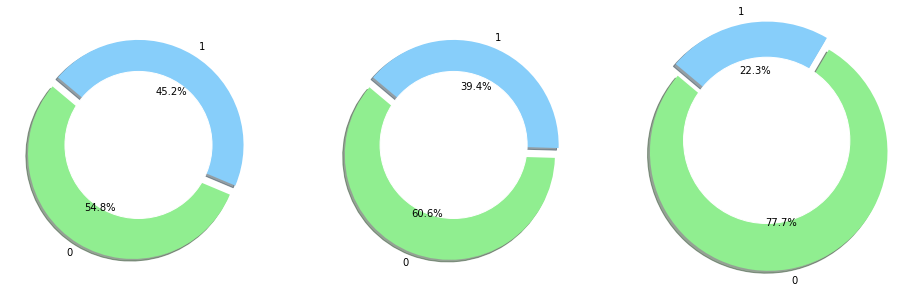

In [40]:
col = ['max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8']
plt.figure(figsize=(16,5))
for i,j in enumerate(col):
    plt.subplot(1,3,i+1)
#     clrs = ['red' if (x == min(j)) else 'grey' for x in j ]
#     sns.barplot(x = 'churn',y=j,data=high_val_customer,hue='churn',color='green')
    labels = list(high_val_customer.groupby('churn')[j].mean().index)
    sizes =list(high_val_customer.groupby('churn')[j].mean().values)
    colors = ['lightgreen', 'lightskyblue']
    explode = (0.1, 0)
    plt.pie(sizes, labels=labels, colors=colors,
    autopct='%1.1f%%', shadow=True, startangle=140,explode=explode)
    my_circle=plt.Circle( (0,0), 0.7, color='white')
    p=plt.gcf()
    p.gca().add_artist(my_circle)
plt.axis('equal')
plt.show()

#### Lets Drop few columns as we are having no use for these now

In [41]:
high_val_customer = high_val_customer.drop(['total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8',
                                            'av_rech_amt_data_6', 'av_rech_amt_data_7', 
                        'av_rech_amt_data_8','total_rech_amt_6','total_rech_amt_7'
              ,'max_rech_amt_6','max_rech_amt_7',
                        'max_rech_data_6','max_rech_data_7','total_rech_data_6','total_rech_data_7','total_rech_data_8'],axis='columns')

#### Lets check the total recharge columns

In [42]:
# Lets check for null values before proceding
high_val_customer[list(high_val_customer.columns[high_val_customer.columns.str.contains('_rech_num_')])].isnull().sum()

total_rech_num_6    0
total_rech_num_7    0
total_rech_num_8    0
dtype: int64

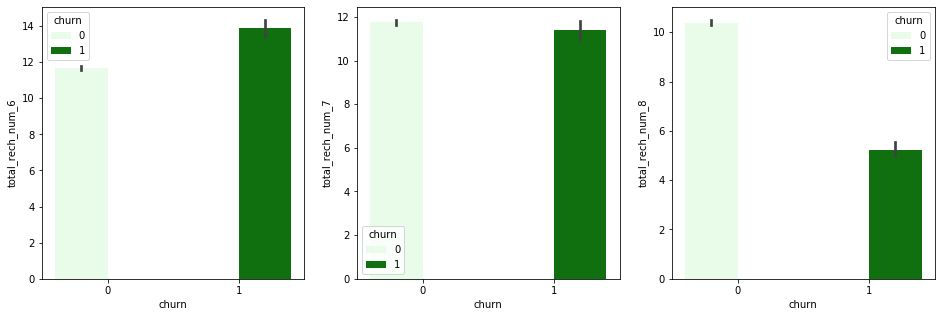

In [43]:
col = ['total_rech_num_6','total_rech_num_7','total_rech_num_8']
plt.figure(figsize=(16,5))
for i,j in enumerate(col):
    plt.subplot(1,3,i+1)
#     clrs = ['red' if (x == min(j)) else 'grey' for x in j ]
    sns.barplot(x = 'churn',y=j,data=high_val_customer,hue='churn',color='green')

####  We can notice a drop for 8th month

In [44]:
# Lets create a total recharge column for good phase
high_val_customer['total_rech_num_good_phase'] = (high_val_customer.total_rech_num_6 + high_val_customer.total_rech_num_7)/2

#### Lets now analize 2g and 3g data

In [45]:
# Lets check the null values before going forward
round((high_val_customer[high_val_customer.columns[high_val_customer.columns.str.contains('2g|3g')
                                            ]].isnull().sum())/len(high_val_customer[high_val_customer.columns[high_val_customer.columns.str.contains('2g|3g')]]),2)

count_rech_2g_6    0.44
count_rech_2g_7    0.43
count_rech_2g_8    0.47
count_rech_3g_6    0.44
count_rech_3g_7    0.43
count_rech_3g_8    0.47
vol_2g_mb_6        0.00
vol_2g_mb_7        0.00
vol_2g_mb_8        0.00
vol_3g_mb_6        0.00
vol_3g_mb_7        0.00
vol_3g_mb_8        0.00
arpu_3g_6          0.44
arpu_3g_7          0.43
arpu_3g_8          0.47
arpu_2g_6          0.44
arpu_2g_7          0.43
arpu_2g_8          0.47
monthly_2g_6       0.00
monthly_2g_7       0.00
monthly_2g_8       0.00
sachet_2g_6        0.00
sachet_2g_7        0.00
sachet_2g_8        0.00
monthly_3g_6       0.00
monthly_3g_7       0.00
monthly_3g_8       0.00
sachet_3g_6        0.00
sachet_3g_7        0.00
sachet_3g_8        0.00
aug_vbc_3g         0.00
jul_vbc_3g         0.00
jun_vbc_3g         0.00
sep_vbc_3g         0.00
dtype: float64

#### As we can find the 2G and 3G usage from the volume columns lets drop the other columns having nearly 50% nulls

In [46]:
high_val_customer = high_val_customer.drop(['total_rech_num_6','total_rech_num_7','count_rech_2g_6','count_rech_2g_7','count_rech_2g_8','count_rech_3g_6','count_rech_3g_7','count_rech_3g_8',
'arpu_3g_6','arpu_3g_7','arpu_3g_8','arpu_2g_6','arpu_2g_7','arpu_2g_8'],axis='columns')

In [47]:
(high_val_customer[high_val_customer.columns[high_val_customer.columns.str.contains('2g|3g')]]).head()

,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,30.13,1.32,5.75,83.57,150.76,109.61,0,0,0,0,0,0,1,1,1,0,0,0,30.40,0.00,101.20,3.58
7,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,57.74,19.38,18.74,0.00
8,0.00,356.00,0.03,0.00,750.95,11.94,0,1,0,0,1,3,0,0,0,0,0,0,21.03,910.65,122.16,0.00
21,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00
23,0.00,0.48,0.01,0.00,599.09,1009.92,0,0,0,0,0,0,0,2,1,0,0,1,40.45,51.86,0.00,0.00


#### Lets analize Mobile internet usage volume (in MB) for 2G and 3G

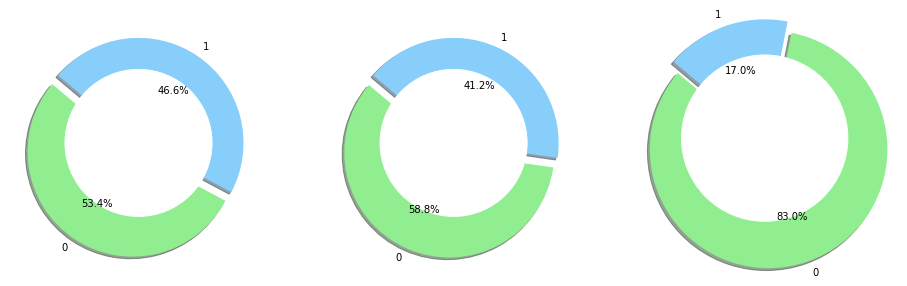

In [48]:
col = ['vol_2g_mb_6', 'vol_2g_mb_7', 'vol_2g_mb_8']
plt.figure(figsize=(16,5))
for i,j in enumerate(col):
    plt.subplot(1,3,i+1)
#     clrs = ['red' if (x == min(j)) else 'grey' for x in j ]
#     sns.barplot(x = 'churn',y=j,data=high_val_customer,hue='churn',color='green')
    labels = list(high_val_customer.groupby('churn')[j].mean().index)
    sizes =list(high_val_customer.groupby('churn')[j].mean().values)
    colors = ['lightgreen', 'lightskyblue']
    explode = (0.1, 0)
    plt.pie(sizes, labels=labels, colors=colors,
    autopct='%1.1f%%', shadow=True, startangle=140,explode=explode)
    my_circle=plt.Circle( (0,0), 0.7, color='white')
    p=plt.gcf()
    p.gca().add_artist(my_circle)
plt.axis('equal')
plt.show()

In [49]:
# lets create some metric on the 2G and 3G Data

In [50]:
high_val_customer['vol_2g_mb_good_phase'] = (high_val_customer.vol_2g_mb_6 + high_val_customer.vol_2g_mb_7)/2
high_val_customer['vol_3g_mb_good_phase'] = (high_val_customer.vol_3g_mb_6 + high_val_customer.vol_3g_mb_7)/2
high_val_customer['monthly_2g_good_phase'] = (high_val_customer.monthly_2g_6 + high_val_customer.monthly_2g_7)/2
high_val_customer['monthly_3g_good_phase'] = (high_val_customer.monthly_3g_6 + high_val_customer.monthly_3g_7)/2

In [51]:
high_val_customer['3g_volume_based_cost'] = (high_val_customer['jun_vbc_3g'] + high_val_customer['jul_vbc_3g'])/2  

In [52]:
high_val_customer = high_val_customer.drop(['vol_2g_mb_6','vol_2g_mb_7','vol_3g_mb_6','vol_3g_mb_7','monthly_2g_6',
                                           'monthly_2g_7','monthly_3g_6','monthly_3g_7','jun_vbc_3g','jul_vbc_3g'],axis=1)

#### Lets check Minutes of usage - voice calls

In [53]:
high_val_customer[high_val_customer.columns[high_val_customer.columns.str.contains('mou')]].head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8
0,0.0,0.0,0.0,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.0,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,4.13,NaN,NaN,1.15,NaN,NaN,5.44,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.0,NaN,NaN,0.00,0.00,0.00,5.44,NaN,NaN,0.0,NaN,NaN,0.00
7,0.0,0.0,0.0,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,0.0,0.0,0.0,60.86,75.14,77.84,0.0,0.18,10.01,4.5,0.0,6.50,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,0.0,0.0,0.0,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59
8,0.0,0.0,0.0,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,0.0,0.0,0.0,130.26,143.48,98.28,0.0,0.00,0.00,0.0,0.0,10.23,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,0.0,0.0,0.0,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00
21,0.0,0.0,0.0,102.41,132.11,85.14,757.93,896.68,983.39,0.00,0.00,0.00,0.00,0.00,0.00,4.48,6.16,23.34,91.81,87.93,104.81,0.75,0.00,1.58,0.0,0.0,0.00,97.04,94.09,129.74,97.93,125.94,61.79,665.36,808.74,876.99,0.00,0.00,0.00,0.0,0.0,0.0,763.29,934.69,938.79,0.0,0.00,0.00,0.0,0.0,0.00,860.34,1028.79,1068.54,2.48,10.19,19.54,118.23,74.63,129.16,4.61,2.84,10.39,125.33,87.68,159.11,14.06,5.98,0.18,67.69,38.23,101.74,0.00,0.00,0.00,0.0,0.0,0.0,81.76,44.21,101.93,207.09,131.89,261.04,0.00,0.0,0.0,0.00,0.00,0.00
23,0.0,0.0,0.0,48.96,50.66,33.58,85.41,89.36,205.89,0.00,0.00,0.00,0.00,0.00,0.00,48.96,50.66,33.58,82.94,83.01,148.56,0.00,0.00,0.00,0.0,0.0,17.71,131.91,133.68,182.14,0.00,0.00,0.00,2.36,6.35,39.61,0.00,0.00,0.00,0.0,0.0,0.0,2.36,6.35,39.61,0.0,0.01,0.00,0.1,0.0,17.71,134.38,140.04,239.48,20.71,61.04,76.64,95.91,113.36,146.84,0.00,0.00,0.71,116.63,174.41,224.21,0.51,0.00,13.38,2.43,14.89,43.91,0.00,0.00,0.00,0.0,0.0,0.0,2.94,14.89,57.29,119.58,222.89,298.33,0.00,0.0,0.0,0.00,28.23,3.74


#### Lets find the columns which contains only 0 and NaN and drop them

In [54]:
mou = list(high_val_customer.columns[high_val_customer.columns.str.contains('mou')])
for i in (mou):
    if(high_val_customer[i].sum()==0.0):
        print(i)        

loc_og_t2o_mou
std_og_t2o_mou
loc_ic_t2o_mou
std_og_t2c_mou_6
std_og_t2c_mou_7
std_og_t2c_mou_8
std_ic_t2o_mou_6
std_ic_t2o_mou_7
std_ic_t2o_mou_8


In [55]:
high_val_customer = high_val_customer.drop(['loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou','std_og_t2c_mou_6',
                                            'std_og_t2c_mou_7','std_og_t2c_mou_8','std_ic_t2o_mou_6','std_ic_t2o_mou_7',
                                            'std_ic_t2o_mou_8'],axis='columns')

In [56]:
(100*high_val_customer[high_val_customer.columns[high_val_customer.columns.str.contains('mou')]].isnull().sum()/len(high_val_customer[high_val_customer.columns[high_val_customer.columns.str.contains('mou')]])).sort_values(ascending=False).head(5)

isd_ic_mou_8        3.913203
loc_og_t2m_mou_8    3.913203
spl_og_mou_8        3.913203
std_og_mou_8        3.913203
std_og_t2f_mou_8    3.913203
dtype: float64

#### we can see theat very less percentage of records are missing for columns( Minutes of usage - voice calls), I am assuming that for that day the phone is not used so i am impution these missing values with 0

In [57]:
high_val_customer[high_val_customer.columns[high_val_customer.columns.str.contains('mou')]] = high_val_customer[high_val_customer.columns[high_val_customer.columns.str.contains('mou')]].replace(np.NaN,0)

In [58]:
high_val_customer[high_val_customer.columns[high_val_customer.columns.str.contains('mou')]].head()

,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8
0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.16,0.00,0.00,4.13,0.00,0.00,1.15,0.00,0.00,5.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.44,0.00,0.0,0.0,0.00,0.00,0.00
7,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.0,0.18,10.01,4.5,0.0,6.50,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59
8,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,130.26,143.48,98.28,0.0,0.00,0.00,0.0,0.0,10.23,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00
21,102.41,132.11,85.14,757.93,896.68,983.39,0.00,0.00,0.00,0.00,0.00,0.00,4.48,6.16,23.34,91.81,87.93,104.81,0.75,0.00,1.58,0.0,0.0,0.00,97.04,94.09,129.74,97.93,125.94,61.79,665.36,808.74,876.99,0.00,0.00,0.00,763.29,934.69,938.79,0.0,0.00,0.00,0.0,0.0,0.00,860.34,1028.79,1068.54,2.48,10.19,19.54,118.23,74.63,129.16,4.61,2.84,10.39,125.33,87.68,159.11,14.06,5.98,0.18,67.69,38.23,101.74,0.00,0.00,0.00,81.76,44.21,101.93,207.09,131.89,261.04,0.00,0.0,0.0,0.00,0.00,0.00
23,48.96,50.66,33.58,85.41,89.36,205.89,0.00,0.00,0.00,0.00,0.00,0.00,48.96,50.66,33.58,82.94,83.01,148.56,0.00,0.00,0.00,0.0,0.0,17.71,131.91,133.68,182.14,0.00,0.00,0.00,2.36,6.35,39.61,0.00,0.00,0.00,2.36,6.35,39.61,0.0,0.01,0.00,0.1,0.0,17.71,134.38,140.04,239.48,20.71,61.04,76.64,95.91,113.36,146.84,0.00,0.00,0.71,116.63,174.41,224.21,0.51,0.00,13.38,2.43,14.89,43.91,0.00,0.00,0.00,2.94,14.89,57.29,119.58,222.89,298.33,0.00,0.0,0.0,0.00,28.23,3.74


#### Now lets analize the variables and create new variables

og: Outgoing Calls
ic: Incoming Calls
offnet: All kind of calls outside the operator T network
onnet: All kind of calls within the same operator network

In [59]:
(high_val_customer[high_val_customer.columns[high_val_customer.columns.str.contains('mou_6')]]).head()

,onnet_mou_6,offnet_mou_6,roam_ic_mou_6,roam_og_mou_6,loc_og_t2t_mou_6,loc_og_t2m_mou_6,loc_og_t2f_mou_6,loc_og_t2c_mou_6,loc_og_mou_6,std_og_t2t_mou_6,std_og_t2m_mou_6,std_og_t2f_mou_6,std_og_mou_6,isd_og_mou_6,spl_og_mou_6,total_og_mou_6,loc_ic_t2t_mou_6,loc_ic_t2m_mou_6,loc_ic_t2f_mou_6,loc_ic_mou_6,std_ic_t2t_mou_6,std_ic_t2m_mou_6,std_ic_t2f_mou_6,std_ic_mou_6,total_ic_mou_6,spl_ic_mou_6,isd_ic_mou_6
0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
7,57.84,453.43,16.23,23.74,51.39,308.63,62.13,0.0,422.16,4.30,49.89,6.66,60.86,0.0,4.5,487.53,58.14,217.56,152.16,427.88,36.89,91.44,52.19,180.54,626.46,0.21,2.06
8,413.69,94.66,0.00,0.00,297.13,80.96,0.00,0.0,378.09,116.56,13.69,0.00,130.26,0.0,0.0,508.36,23.84,57.58,0.00,81.43,0.00,22.43,0.00,22.43,103.86,0.00,0.00
21,102.41,757.93,0.00,0.00,4.48,91.81,0.75,0.0,97.04,97.93,665.36,0.00,763.29,0.0,0.0,860.34,2.48,118.23,4.61,125.33,14.06,67.69,0.00,81.76,207.09,0.00,0.00
23,48.96,85.41,0.00,0.00,48.96,82.94,0.00,0.0,131.91,0.00,2.36,0.00,2.36,0.0,0.1,134.38,20.71,95.91,0.00,116.63,0.51,2.43,0.00,2.94,119.58,0.00,0.00


In [60]:
high_val_customer[high_val_customer.columns[high_val_customer.columns.str.contains('mou_7')]].head()

,onnet_mou_7,offnet_mou_7,roam_ic_mou_7,roam_og_mou_7,loc_og_t2t_mou_7,loc_og_t2m_mou_7,loc_og_t2f_mou_7,loc_og_t2c_mou_7,loc_og_mou_7,std_og_t2t_mou_7,std_og_t2m_mou_7,std_og_t2f_mou_7,std_og_mou_7,isd_og_mou_7,spl_og_mou_7,total_og_mou_7,loc_ic_t2t_mou_7,loc_ic_t2m_mou_7,loc_ic_t2f_mou_7,loc_ic_mou_7,std_ic_t2t_mou_7,std_ic_t2m_mou_7,std_ic_t2f_mou_7,std_ic_mou_7,total_ic_mou_7,spl_ic_mou_7,isd_ic_mou_7
0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00
7,54.68,567.16,33.49,12.59,31.38,447.38,55.14,0.0,533.91,23.29,31.76,20.08,75.14,0.18,0.0,609.24,32.26,221.49,101.46,355.23,11.83,126.99,34.24,173.08,558.04,0.0,14.53
8,351.03,80.63,0.00,0.00,217.59,70.58,0.00,0.0,288.18,133.43,10.04,0.00,143.48,0.00,0.0,431.66,9.84,13.98,0.00,23.83,0.58,4.08,0.00,4.66,28.49,0.0,0.00
21,132.11,896.68,0.00,0.00,6.16,87.93,0.00,0.0,94.09,125.94,808.74,0.00,934.69,0.00,0.0,1028.79,10.19,74.63,2.84,87.68,5.98,38.23,0.00,44.21,131.89,0.0,0.00
23,50.66,89.36,0.00,0.00,50.66,83.01,0.00,0.0,133.68,0.00,6.35,0.00,6.35,0.01,0.0,140.04,61.04,113.36,0.00,174.41,0.00,14.89,0.00,14.89,222.89,0.0,28.23


#### Lets Create some new derived features from the outgoing variable

In [61]:
high_val_customer['spl_og_mou_good_phase'] = (high_val_customer.spl_og_mou_6 + high_val_customer.spl_og_mou_7)/2
high_val_customer['isd_og_mou_good_phase'] = (high_val_customer.isd_og_mou_6 + high_val_customer.isd_og_mou_7)/2
high_val_customer['roam_og_mou_good_phase'] = (high_val_customer.roam_og_mou_6 + high_val_customer.roam_og_mou_7)/2
high_val_customer['std_og_t2m_mou_good_phase'] = (high_val_customer.std_og_t2m_mou_6 + high_val_customer.std_og_t2m_mou_7)/2
high_val_customer['std_og_t2t_mou_good_phase'] = (high_val_customer.std_og_t2t_mou_6 + high_val_customer.std_og_t2t_mou_7)/2
high_val_customer['std_og_t2f_mou_good_phase'] = (high_val_customer.std_og_t2f_mou_6 + high_val_customer.std_og_t2f_mou_7)/2
high_val_customer['loc_og_t2m_mou_good_phase'] = (high_val_customer.loc_og_t2m_mou_6 + high_val_customer.loc_og_t2m_mou_7)/2
high_val_customer['loc_og_t2t_mou_good_phase'] = (high_val_customer.loc_og_t2t_mou_6 + high_val_customer.loc_og_t2t_mou_7)/2
high_val_customer['loc_og_t2f_mou_good_phase'] = (high_val_customer.loc_og_t2f_mou_6 + high_val_customer.loc_og_t2f_mou_7)/2
high_val_customer['loc_og_t2c_mou_good_phase'] = (high_val_customer.loc_og_t2c_mou_6 + high_val_customer.loc_og_t2c_mou_7)/2
high_val_customer['loc_og_mou_good_phase'] = (high_val_customer.loc_og_mou_6 + high_val_customer.loc_og_mou_7)/2
high_val_customer['std_og_mou_good_phase'] = (high_val_customer.std_og_mou_6 + high_val_customer.std_og_mou_7)/2
high_val_customer['total_og_mou_good_phase'] = (high_val_customer.total_og_mou_6 + high_val_customer.total_og_mou_7)/2

In [62]:
high_val_customer = high_val_customer.drop(['spl_og_mou_6','spl_og_mou_7','isd_og_mou_6','isd_og_mou_7','roam_og_mou_6',
                                            'roam_og_mou_7','std_og_t2m_mou_6','std_og_t2m_mou_7','std_og_t2t_mou_6',
                                           'std_og_t2t_mou_7','std_og_t2f_mou_6','std_og_t2f_mou_7','loc_og_t2m_mou_6',
                                           'loc_og_t2m_mou_7','loc_og_t2t_mou_6','loc_og_t2t_mou_7','loc_og_t2f_mou_6',
                                           'loc_og_t2f_mou_7','loc_og_t2c_mou_6','loc_og_t2c_mou_7','loc_og_mou_6',
                                           'loc_og_mou_7','std_og_mou_6','std_og_mou_7','total_og_mou_6',
                                           'total_og_mou_7'],axis='columns')

#### Lets Create some new derived features from the incomin variable

In [63]:
list(high_val_customer.columns[high_val_customer.columns.str.contains('.*_ic_.*mou_',regex=True)])

['roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'loc_ic_t2t_mou_6',
 'loc_ic_t2t_mou_7',
 'loc_ic_t2t_mou_8',
 'loc_ic_t2m_mou_6',
 'loc_ic_t2m_mou_7',
 'loc_ic_t2m_mou_8',
 'loc_ic_t2f_mou_6',
 'loc_ic_t2f_mou_7',
 'loc_ic_t2f_mou_8',
 'loc_ic_mou_6',
 'loc_ic_mou_7',
 'loc_ic_mou_8',
 'std_ic_t2t_mou_6',
 'std_ic_t2t_mou_7',
 'std_ic_t2t_mou_8',
 'std_ic_t2m_mou_6',
 'std_ic_t2m_mou_7',
 'std_ic_t2m_mou_8',
 'std_ic_t2f_mou_6',
 'std_ic_t2f_mou_7',
 'std_ic_t2f_mou_8',
 'std_ic_mou_6',
 'std_ic_mou_7',
 'std_ic_mou_8',
 'total_ic_mou_6',
 'total_ic_mou_7',
 'total_ic_mou_8',
 'spl_ic_mou_6',
 'spl_ic_mou_7',
 'spl_ic_mou_8',
 'isd_ic_mou_6',
 'isd_ic_mou_7',
 'isd_ic_mou_8']

In [64]:
high_val_customer[['og_others_6','og_others_7','ic_others_6','ic_others_7']].isnull().sum()

og_others_6    545
og_others_7    537
ic_others_6    545
ic_others_7    537
dtype: int64

In [65]:
high_val_customer[['og_others_6','og_others_7','ic_others_6','ic_others_7']] = high_val_customer[['og_others_6','og_others_7','ic_others_6','ic_others_7']].replace(np.NaN,0)

In [66]:
high_val_customer['spl_ic_mou_good_phase'] = (high_val_customer.spl_ic_mou_6 + high_val_customer.spl_ic_mou_7)/2
high_val_customer['isd_ic_mou_good_phase'] = (high_val_customer.isd_ic_mou_6 + high_val_customer.isd_ic_mou_7)/2

high_val_customer['roam_ic_mou_good_phase'] = (high_val_customer.roam_ic_mou_6 + high_val_customer.roam_ic_mou_7)/2
high_val_customer['std_ic_t2m_mou_good_phase'] = (high_val_customer.std_ic_t2m_mou_6 + high_val_customer.std_ic_t2m_mou_7)/2
high_val_customer['std_ic_t2t_mou_good_phase'] = (high_val_customer.std_ic_t2t_mou_6 + high_val_customer.std_ic_t2t_mou_7)/2
high_val_customer['std_ic_t2f_mou_good_phase'] = (high_val_customer.std_ic_t2f_mou_6 + high_val_customer.std_ic_t2f_mou_7)/2

high_val_customer['loc_ic_t2m_mou_good_phase'] = (high_val_customer.loc_ic_t2m_mou_6 + high_val_customer.loc_ic_t2m_mou_7)/2
high_val_customer['loc_ic_t2t_mou_good_phase'] = (high_val_customer.loc_ic_t2t_mou_6 + high_val_customer.loc_ic_t2t_mou_7)/2
high_val_customer['loc_ic_t2f_mou_good_phase'] = (high_val_customer.loc_ic_t2f_mou_6 + high_val_customer.loc_ic_t2f_mou_7)/2
high_val_customer['loc_ic_t2c_mou_good_phase'] = (high_val_customer.loc_ic_mou_6 + high_val_customer.loc_ic_mou_7)/2

high_val_customer['std_ic_mou_good_phase'] = (high_val_customer.std_ic_mou_6 + high_val_customer.std_ic_mou_7)/2
high_val_customer['total_ic_mou_good_phase'] = (high_val_customer.total_ic_mou_6 + high_val_customer.total_ic_mou_7)/2
high_val_customer['og_others_good_phase'] = (high_val_customer.og_others_6 + high_val_customer.og_others_7)/2
high_val_customer['ic_others_good_phase'] = (high_val_customer.ic_others_6 + high_val_customer.ic_others_7)/2

In [67]:
high_val_customer = high_val_customer.drop(  ['roam_ic_mou_6',  'roam_ic_mou_7',  'loc_ic_t2t_mou_6',  'loc_ic_t2t_mou_7', 
                                              'loc_ic_t2m_mou_6',  'loc_ic_t2m_mou_7',  'loc_ic_t2f_mou_6',  
                                              'loc_ic_t2f_mou_7',  'loc_ic_mou_6',  'loc_ic_mou_7',  'std_ic_t2t_mou_6',  
                                              'std_ic_t2t_mou_7',  'std_ic_t2m_mou_6',  'std_ic_t2m_mou_7',  
                                              'std_ic_t2f_mou_6',  'std_ic_t2f_mou_7',  'std_ic_mou_6',  'std_ic_mou_7',  
                                              'total_ic_mou_6',  'total_ic_mou_7',  'spl_ic_mou_6',  'spl_ic_mou_7',  
                                              'isd_ic_mou_6',  'isd_ic_mou_7','og_others_6',
                                             'og_others_7','ic_others_6','ic_others_7'] ,axis='columns' )

#### Lets create some variable for offnet usage

In [68]:
list(high_val_customer.columns[high_val_customer.columns.str.contains('offnet',regex=True)])

['offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8']

In [69]:
# As the variables are less lets analize this with a bar chart

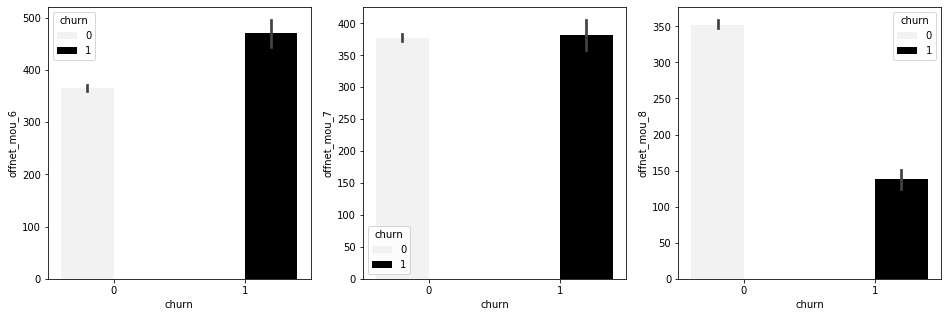

In [70]:
# lets check the rechare done by customer on last date on month 7 and 8
col = ['offnet_mou_6','offnet_mou_7','offnet_mou_8']
plt.figure(figsize=(16,5))
for i,j in enumerate(col):
    plt.subplot(1,3,i+1)
#     clrs = ['red' if (x == min(j)) else 'grey' for x in j ]
    sns.barplot(x = 'churn',y=j,data=high_val_customer,hue='churn',color='black')

In [71]:
high_val_customer['offnet_mou_good_phase'] = (high_val_customer.offnet_mou_6 +high_val_customer.offnet_mou_7 )/2
high_val_customer = high_val_customer.drop(['offnet_mou_6','offnet_mou_7'],axis='columns')

#### Onnet new described variable

In [72]:
list(high_val_customer.columns[high_val_customer.columns.str.contains('onnet',regex=True)])

['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8']

In [73]:
high_val_customer['onnet_mou_good_phase'] = (high_val_customer.onnet_mou_6 +high_val_customer.onnet_mou_7 )/2
high_val_customer = high_val_customer.drop(['onnet_mou_6','onnet_mou_7'],axis='columns')

In [74]:
(100*high_val_customer.isnull().sum()/len(high_val_customer.index)).sort_values(ascending=False).head(10)

date_of_last_rech_data_8    46.825106
night_pck_user_8            46.825106
fb_user_8                   46.825106
fb_user_6                   44.148528
night_pck_user_6            44.148528
date_of_last_rech_data_6    44.148528
fb_user_7                   43.145228
date_of_last_rech_data_7    43.145228
night_pck_user_7            43.145228
og_others_8                  3.913203
dtype: float64

In [75]:
# Lets drop these columns which is having more then 40% nulls
high_val_customer = high_val_customer.drop(['night_pck_user_8','fb_user_8','date_of_last_rech_data_8',
                                            'date_of_last_rech_data_6','fb_user_6','night_pck_user_6',
                                            'date_of_last_rech_data_7','fb_user_7','night_pck_user_7',
                                            'ic_others_8'],axis='columns')

#### Lets analyse Service schemes with validity smaller than a month

In [76]:
high_val_customer.columns[high_val_customer.columns.str.contains('sachet',regex=True)]

Index(['sachet_2g_6', 'sachet_2g_7', 'sachet_2g_8', 'sachet_3g_6',
       'sachet_3g_7', 'sachet_3g_8'],
      dtype='object')

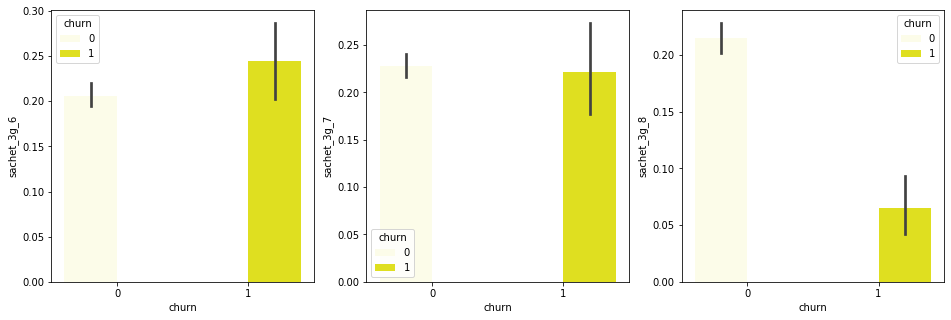

In [77]:
col = ['sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8']
plt.figure(figsize=(16,5))
for i,j in enumerate(col):
    plt.subplot(1,3,i+1)
#     clrs = ['red' if (x == min(j)) else 'grey' for x in j ]
    sns.barplot(x = 'churn',y=j,data=high_val_customer,hue='churn',color='yellow')

In [78]:
high_val_customer['sachet_2g_good_phase'] = (high_val_customer.sachet_2g_6 + high_val_customer.sachet_2g_7)/2
high_val_customer['sachet_3g_good_phase'] = (high_val_customer.sachet_3g_6 + high_val_customer.sachet_3g_7)/2

high_val_customer = high_val_customer.drop(['sachet_2g_6','sachet_2g_7','sachet_3g_6','sachet_3g_7'],axis=1)

#### Lets analyse the date columns

In [79]:
date_col = list([high_val_customer.columns[high_val_customer.columns.str.contains('date')]])
date_col

[Index(['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
        'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8'],
       dtype='object')]

In [80]:
high_val_customer['last_date_of_month_6'] = pd.to_datetime(high_val_customer['last_date_of_month_6'])
high_val_customer['last_date_of_month_7'] = pd.to_datetime(high_val_customer['last_date_of_month_7'])
high_val_customer['last_date_of_month_8'] = pd.to_datetime(high_val_customer['last_date_of_month_8'])
high_val_customer['date_of_last_rech_6'] = pd.to_datetime(high_val_customer['date_of_last_rech_6'])
high_val_customer['date_of_last_rech_7'] = pd.to_datetime(high_val_customer['date_of_last_rech_7'])
high_val_customer['date_of_last_rech_8'] = pd.to_datetime(high_val_customer['date_of_last_rech_8'])

#### Lets create numeric day column from the date columns

In [81]:
high_val_customer['last_day_of_month_6'] = high_val_customer.last_date_of_month_6.dt.day
high_val_customer['last_day_of_month_7'] = high_val_customer.last_date_of_month_7.dt.day
high_val_customer['last_day_of_month_8'] = high_val_customer.last_date_of_month_8.dt.day
high_val_customer['day_of_last_rech_6'] = high_val_customer.date_of_last_rech_6.dt.day
high_val_customer['day_of_last_rech_7'] = high_val_customer.date_of_last_rech_7.dt.day
high_val_customer['day_of_last_rech_8'] = high_val_customer.date_of_last_rech_8.dt.day

In [82]:
high_val_customer = high_val_customer.drop(['last_date_of_month_6','last_date_of_month_7','last_date_of_month_8',
                                           'date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8'],axis='columns')

#### Lets analyze arpu columns

In [83]:
high_val_customer.columns[high_val_customer.columns.str.contains('arpu_')]

Index(['arpu_6', 'arpu_7', 'arpu_8'], dtype='object')

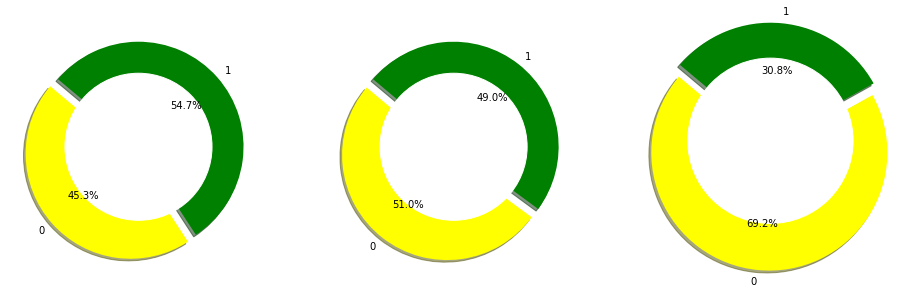

In [84]:
col = ['arpu_6', 'arpu_7', 'arpu_8']
plt.figure(figsize=(16,5))
for i,j in enumerate(col):
    plt.subplot(1,3,i+1)
#     clrs = ['red' if (x == min(j)) else 'grey' for x in j ]
#     sns.barplot(x = 'churn',y=j,data=high_val_customer,hue='churn',color='green')
    labels = list(high_val_customer.groupby('churn')[j].mean().index)
    sizes =list(high_val_customer.groupby('churn')[j].mean().values)
    colors = ['yellow', 'green']
    explode = (0.1, 0)
    plt.pie(sizes, labels=labels, colors=colors,
    autopct='%1.1f%%', shadow=True, startangle=140,explode=explode)
    my_circle=plt.Circle( (0,0), 0.7, color='white')
    p=plt.gcf()
    p.gca().add_artist(my_circle)
plt.axis('equal')
plt.show()

In [85]:
high_val_customer['arpu_good_phase'] = (high_val_customer.arpu_6 + high_val_customer.arpu_7)/2
high_val_customer = high_val_customer.drop(['arpu_6','arpu_7'],axis='columns')

#### Age on network

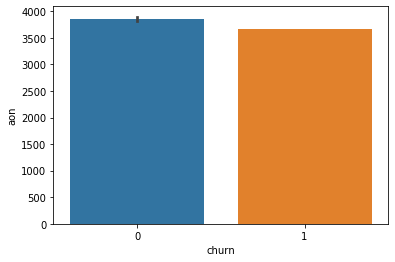

In [86]:
sns.barplot(y = high_val_customer.aon.sort_values(ascending=False).head(100),x=high_val_customer.churn)

#### Lets check the null values  

In [87]:
high_val_customer.isnull().sum().sort_values(ascending=False).head(7)

og_others_8            1174
day_of_last_rech_8      583
last_day_of_month_8     165
day_of_last_rech_7       98
day_of_last_rech_6       73
last_day_of_month_7      27
arpu_good_phase           0
dtype: int64

#### Here we assume that these are the days where there is no use by customers hence i am imputing them with 0

In [88]:
high_val_customer[['og_others_8','day_of_last_rech_8','last_day_of_month_8','day_of_last_rech_7','day_of_last_rech_6',
                  'last_day_of_month_7' ,'arpu_good_phase']] = high_val_customer[['og_others_8','day_of_last_rech_8',
                                                                                'last_day_of_month_8','day_of_last_rech_7',
                                                                                'day_of_last_rech_6','last_day_of_month_7' 
                                                                                ,'arpu_good_phase']].replace(np.NaN,0)

In [89]:
high_val_customer.shape

(30001, 99)

#### Lets build the model

In [90]:
high_val_customer.head()

,mobile_number,circle_id,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_8,std_og_t2f_mou_8,std_og_mou_8,isd_og_mou_8,spl_og_mou_8,og_others_8,total_og_mou_8,loc_ic_t2t_mou_8,loc_ic_t2m_mou_8,loc_ic_t2f_mou_8,loc_ic_mou_8,std_ic_t2t_mou_8,std_ic_t2m_mou_8,std_ic_t2f_mou_8,std_ic_mou_8,total_ic_mou_8,spl_ic_mou_8,isd_ic_mou_8,total_rech_num_8,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,max_rech_data_8,vol_2g_mb_8,vol_3g_mb_8,monthly_2g_8,sachet_2g_8,monthly_3g_8,sachet_3g_8,aon,aug_vbc_3g,sep_vbc_3g,tot_rech_amt_data_6,tot_rech_amt_data_7,tot_rech_amt_data_8,total_avg_rech_amnt,churn,total_rech_amt_good_phase,total_rech_amt_data_good_phase,max_rech_amt_good_phase,avg_of_max_rech_data_good_phase,total_rech_num_good_phase,vol_2g_mb_good_phase,vol_3g_mb_good_phase,monthly_2g_good_phase,monthly_3g_good_phase,3g_volume_based_cost,spl_og_mou_good_phase,isd_og_mou_good_phase,roam_og_mou_good_phase,std_og_t2m_mou_good_phase,std_og_t2t_mou_good_phase,std_og_t2f_mou_good_phase,loc_og_t2m_mou_good_phase,loc_og_t2t_mou_good_phase,loc_og_t2f_mou_good_phase,loc_og_t2c_mou_good_phase,loc_og_mou_good_phase,std_og_mou_good_phase,total_og_mou_good_phase,spl_ic_mou_good_phase,isd_ic_mou_good_phase,roam_ic_mou_good_phase,std_ic_t2m_mou_good_phase,std_ic_t2t_mou_good_phase,std_ic_t2f_mou_good_phase,loc_ic_t2m_mou_good_phase,loc_ic_t2t_mou_good_phase,loc_ic_t2f_mou_good_phase,loc_ic_t2c_mou_good_phase,std_ic_mou_good_phase,total_ic_mou_good_phase,og_others_good_phase,ic_others_good_phase,offnet_mou_good_phase,onnet_mou_good_phase,sachet_2g_good_phase,sachet_3g_good_phase,last_day_of_month_6,last_day_of_month_7,last_day_of_month_8,day_of_last_rech_6,day_of_last_rech_7,day_of_last_rech_8,arpu_good_phase
0,7000842753,109,213.803,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.16,4.13,1.15,5.44,0.00,0.00,0.00,0.00,5.44,0.0,0.00,2,252,252,252,252,252.0,5.75,109.61,0,0,1,0,968,30.40,3.58,252.0,252.0,252.0,279.5,1,307.0,252.0,252.0,252.0,3.5,15.725,117.165,0.0,1.0,50.600,0.00,0.000,0.000,0.000,0.000,0.00,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.00,0.0,0.0,30,31.0,31.0,21.0,16.0,8.0,206.1005
7,7000701601,109,3171.480,52.29,325.91,31.64,38.06,40.28,162.28,53.23,0.00,255.79,12.01,49.14,16.68,77.84,10.01,6.50,0.0,350.16,27.31,121.19,39.53,188.04,30.39,141.33,22.21,193.94,428.74,0.0,31.59,7,1580,0,0,779,0.0,0.00,0.00,0,0,0,0,802,57.74,0.00,0.0,0.0,0.0,592.5,1,1185.0,0.0,1185.0,0.0,5.0,0.000,0.000,0.0,0.0,19.060,2.25,0.090,18.165,40.825,13.795,13.37,378.005,41.385,58.635,0.0,478.035,68.000,548.385,0.105,8.295,24.86,109.215,24.360,43.215,219.525,45.200,126.810,391.555,176.810,592.250,0.0,15.465,510.295,56.26,0.0,0.0,30,31.0,31.0,27.0,25.0,26.0,1209.5150
8,7001524846,109,137.362,35.08,136.48,0.00,0.00,12.49,50.54,0.00,7.15,63.04,22.58,75.69,0.00,98.28,0.00,10.23,0.0,171.56,0.31,15.48,0.00,15.79,0.10,0.65,0.00,0.75,16.54,0.0,0.00,14,30,50,0,10,23.0,0.03,11.94,0,3,0,0,315,21.03,0.00,0.0,354.0,207.0,348.0,0,519.0,177.0,122.0,77.0,20.0,178.000,375.475,0.5,0.0,516.405,0.00,0.000,0.000,11.865,124.995,0.00,75.770,257.360,0.000,0.0,333.135,136.870,470.010,0.000,0.000,0.00,13.255,0.290,0.000,35.780,16.840,0.000,52.630,13.545,66.175,0.0,0.000,87.645,382.36,0.5,0.0,30,31.0,31.0,25.0,31.0,30.0,435.4720
21,7002124215,109,637.760,85.14,983.39,0.00,0.00,23.34,104.81,1.58,0.00,129.74,61.79,876.99,0.00,938.79,0.00,0.00,0.0,1068.54,19.54,129.16,10.39,159.11,0.18,101.74,0.00,101.93,261.04,0.0,0.00,27,50,30,20,50,0.0,0.00,0.00,0,0,0,0,720,0.00,0.00,0.0,0.0,0.0,320.0,0,640.0,0.0,50.0,0.0,24.0,0.000,0.000,0.0,0.0,0.000,0.00,0.000,0.000,737.050,111.935,0.00,89.870,5.320,0.375,0.0,95.565,848.990,944.565,0.000,0.000,0.00,52.960,10.020,0.000,96.430,6.335,3.725,106.505,62.985,169.490,0.0,0.000,827.305,117.26,0.0,0.0,

In [91]:
HVC=high_val_customer

#### We donot need ['mobile_number','circle_id'] so i am going to drop these columns

In [98]:
high_val_customer = high_val_customer.drop(['mobile_number','circle_id'],axis='columns')

In [99]:
df_y = high_val_customer.pop('churn')
df_X = high_val_customer

#### Lets do a train test split on the data

In [100]:
X_train,X_test,y_train,y_test = train_test_split(df_X,df_y,train_size=0.7,test_size=0.3,random_state=42)

#### I am going to use RobustScaler (This Scaler removes the median and scales the data according to the quantile range (defaults to IQR: Interquartile Range). The IQR is the range between the 1st quartile (25th quantile) and the 3rd quartile (75th quantile).)

In [101]:
cols = list(X_train.columns)
scale = RobustScaler()
X_train[cols] = scale.fit_transform(X_train[cols])
X_test[cols] = scale.transform(X_test[cols])

In [102]:
# Lets create our base model any changes after this should be better then this model
lr_base = LogisticRegression()
lr_base.fit(X_train,y_train)
base_pred = lr_base.predict(X_test)

#### Lets create a generic function to print all metrics

In [103]:
def AllMeasure(y_true,y_pred):
    conf_metrix = confusion_matrix(y_true,y_pred)
    TP = conf_metrix[1,1]
    TN = conf_metrix[0,0]
    FN = conf_metrix[1,0]
    FP = conf_metrix[0,1]
    sensitivity = TP / float(TP+FN)
    specificity = TN / float(TN+FP)
    fpr = (FP/ float(TN+FP))
    pos_pred_val = (TP / float(TP+FP))
    neg_pred_val = (TN / float(TN+ FN))
    precision = precision_score(y_true,y_pred)
    recall = recall_score(y_true,y_pred)
    accuracy = accuracy_score(y_true,y_pred)
    f1score = f1_score(y_true,y_pred)
    metric_frame = pd.DataFrame([{'sensitivity':sensitivity,'specificity':specificity,'fpr':fpr,'pos_pred_val':pos_pred_val,
                                    'neg_pred_val':neg_pred_val,'precision':precision,'recall':recall,
                                    'accuracy':accuracy,'f1score':f1score}])
    print(metric_frame)
    print('\n')
    print(conf_metrix)
    print('\n')
    print(classification_report(y_true,y_pred))

In [104]:
AllMeasure(y_test,base_pred)

   accuracy   f1score       fpr  neg_pred_val  pos_pred_val  precision  \
0  0.932563  0.386249  0.011687      0.941467      0.663194   0.663194   

     recall  sensitivity  specificity  
0  0.272468     0.272468     0.988313  


[[8203   97]
 [ 510  191]]


              precision    recall  f1-score   support

           0       0.94      0.99      0.96      8300
           1       0.66      0.27      0.39       701

    accuracy                           0.93      9001
   macro avg       0.80      0.63      0.68      9001
weighted avg       0.92      0.93      0.92      9001



#### From the confusion metrix we can see there is a high class imbalence so we are going to use both OverSampling and UnderSampling to find out which works best for us

In [105]:
smote = SMOTE()
nearmiss = NearMiss()

In [106]:
X_sm, y_sm = smote.fit_sample(X_train, y_train)
X_nm, y_nm = smote.fit_sample(X_train, y_train)

##### Prediction with Over Sampling Method

In [107]:
lr_sampling = LogisticRegression()
lr_sampling.fit(X_sm,y_sm)
over_sample_pred = lr_sampling.predict(X_test)
AllMeasure(y_test,over_sample_pred)

   accuracy   f1score       fpr  neg_pred_val  pos_pred_val  precision  \
0  0.837574  0.441985  0.161446      0.982773       0.30172    0.30172   

     recall  sensitivity  specificity  
0  0.825963     0.825963     0.838554  


[[6960 1340]
 [ 122  579]]


              precision    recall  f1-score   support

           0       0.98      0.84      0.90      8300
           1       0.30      0.83      0.44       701

    accuracy                           0.84      9001
   macro avg       0.64      0.83      0.67      9001
weighted avg       0.93      0.84      0.87      9001



#### Prediction with Over Sampling Method

In [108]:
lr_sampling_n = LogisticRegression()
lr_sampling_n.fit(X_nm, y_nm)
under_sample_pred = lr_sampling_n.predict(X_test)
AllMeasure(y_test,under_sample_pred)

   accuracy   f1score       fpr  neg_pred_val  pos_pred_val  precision  \
0  0.837129  0.441736  0.162048        0.9829      0.301299   0.301299   

     recall  sensitivity  specificity  
0  0.827389     0.827389     0.837952  


[[6955 1345]
 [ 121  580]]


              precision    recall  f1-score   support

           0       0.98      0.84      0.90      8300
           1       0.30      0.83      0.44       701

    accuracy                           0.84      9001
   macro avg       0.64      0.83      0.67      9001
weighted avg       0.93      0.84      0.87      9001



#### As both the techniques are giving similar result lets go ahead with the OverSampling techniques

#### Lets start with PCA for dimension reduction

In [109]:
pca_solver = PCA(svd_solver='randomized',random_state=42)

In [110]:
pca_solver.fit(X_sm,y_sm)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
    svd_solver='randomized', tol=0.0, whiten=False)

#### Lets create scree plot

Text(0,0.5,'Total Variance Explained')

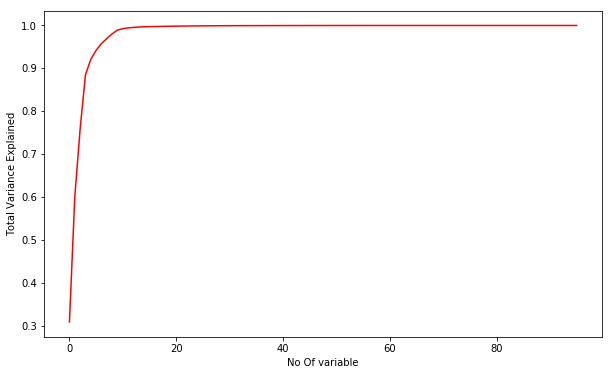

In [111]:
plt.figure(figsize=(10,6))
plt.plot(np.cumsum(pca_solver.explained_variance_ratio_),c='red')
plt.xlabel('No Of variable')
plt.ylabel('Total Variance Explained')

#### lets use incremental PCA where we are going to select 90% variance

In [112]:
pca_inc_f = IncrementalPCA(n_components=30)
X_sm_pca = pca_inc_f.fit_transform(X_sm)
X_test_pca = pca_inc_f.transform(X_test)

In [113]:
print(X_sm_pca.shape,X_test_pca.shape)

(38520, 30) (9001, 30)


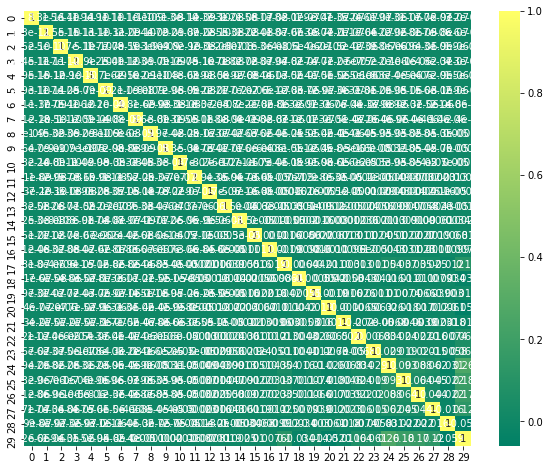

In [114]:
corr = np.corrcoef(X_sm_pca.transpose())
plt.figure(figsize=(10,8))
sns.heatmap(corr,cmap='summer',annot=True)

In [115]:
# Lets create the model again
lr_pc = LogisticRegression()
lr_pc.fit(X_sm_pca,y_sm)
lr_pc_pred = lr_pc.predict(X_test_pca)
AllMeasure(y_test,lr_pc_pred)

   accuracy   f1score       fpr  neg_pred_val  pos_pred_val  precision  \
0  0.759027  0.343324  0.245181      0.979059      0.217909   0.217909   

     recall  sensitivity  specificity  
0  0.808845     0.808845     0.754819  


[[6265 2035]
 [ 134  567]]


              precision    recall  f1-score   support

           0       0.98      0.75      0.85      8300
           1       0.22      0.81      0.34       701

    accuracy                           0.76      9001
   macro avg       0.60      0.78      0.60      9001
weighted avg       0.92      0.76      0.81      9001



####  Now lets manually adjust the cutoff for the model

In [116]:
lr_pc_pred_prob = lr_pc.predict_proba(X_test_pca)

In [117]:
prob_df = pd.DataFrame(lr_pc_pred_prob).iloc[:,[1]]
y_test_df = pd.DataFrame(y_test)
y_test_df['ID'] = y_test_df.index
prob_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
y_test_pred_final = pd.concat([prob_df,y_test_df],axis=1)
y_test_pred_final = y_test_pred_final.rename(columns={ 1 : 'Prob'})

In [118]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_test_pred_final[i]= y_test_pred_final.Prob.map( lambda x: 1 if x > i else 0)
y_test_pred_final.head()

,Prob,churn,ID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0.000796,0,7526,1,0,0,0,0,0,0,0,0,0
1,0.770437,1,74907,1,1,1,1,1,1,1,1,0,0
2,0.895219,0,99617,1,1,1,1,1,1,1,1,1,0
3,0.060343,0,83565,1,0,0,0,0,0,0,0,0,0
4,0.391347,0,8695,1,1,1,1,0,0,0,0,0,0


In [119]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = confusion_matrix(y_test_pred_final.churn, y_test_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.077880  1.000000  0.000000
0.1   0.1  0.374736  0.958631  0.325422
0.2   0.2  0.482946  0.928673  0.445301
0.3   0.3  0.580491  0.894437  0.553976
0.4   0.4  0.674814  0.861626  0.659036
0.5   0.5  0.759027  0.808845  0.754819
0.6   0.6  0.842018  0.756063  0.849277
0.7   0.7  0.898456  0.647646  0.919639
0.8   0.8  0.926564  0.385164  0.972289
0.9   0.9  0.927230  0.154066  0.992530


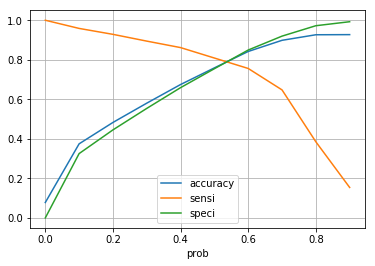

In [120]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.grid()
plt.show()

In [121]:
y_test_pred_final['final_predicted'] = y_test_pred_final.Prob.map( lambda x: 1 if x > 0.5 else 0)

In [122]:
y_test_pred_final.head()

,Prob,churn,ID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0.000796,0,7526,1,0,0,0,0,0,0,0,0,0,0
1,0.770437,1,74907,1,1,1,1,1,1,1,1,0,0,1
2,0.895219,0,99617,1,1,1,1,1,1,1,1,1,0,1
3,0.060343,0,83565,1,0,0,0,0,0,0,0,0,0,0
4,0.391347,0,8695,1,1,1,1,0,0,0,0,0,0,0


In [123]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

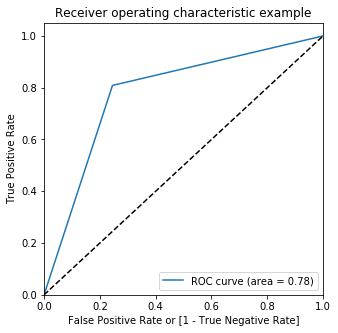

In [124]:
draw_roc(y_test_pred_final.churn, y_test_pred_final.final_predicted)

#####  Lets check our final base model score

In [125]:
AllMeasure(y_test_pred_final.churn, y_test_pred_final.final_predicted)

   accuracy   f1score       fpr  neg_pred_val  pos_pred_val  precision  \
0  0.759027  0.343324  0.245181      0.979059      0.217909   0.217909   

     recall  sensitivity  specificity  
0  0.808845     0.808845     0.754819  


[[6265 2035]
 [ 134  567]]


              precision    recall  f1-score   support

           0       0.98      0.75      0.85      8300
           1       0.22      0.81      0.34       701

    accuracy                           0.76      9001
   macro avg       0.60      0.78      0.60      9001
weighted avg       0.92      0.76      0.81      9001



#### Lets Start with Decission tree classifier

In [126]:
from sklearn.tree import DecisionTreeClassifier
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'criterion': ["entropy", "gini"]
}

n_folds = 5

# Instantiate the grid search model
dtree = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, 
                          cv = n_folds, verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_sm_pca,y_sm)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:  1.9min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(5, 15, 5),
                      

In [127]:
grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'min_samples_leaf': 50,
 'min_samples_split': 100}

In [128]:
clf_gini = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=50,
                                  min_samples_split=50)
clf_gini.fit(X_sm_pca,y_sm)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=50, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=100, splitter='best')

In [129]:
tree_pred = clf_gini.predict(X_test_pca)
AllMeasure(y_test,tree_pred)

   accuracy   f1score       fpr  neg_pred_val  pos_pred_val  precision  \
0  0.834796  0.404008  0.155422      0.972665      0.280936   0.280936   

     recall  sensitivity  specificity  
0  0.718973     0.718973     0.844578  


[[7010 1290]
 [ 197  504]]


              precision    recall  f1-score   support

           0       0.97      0.84      0.90      8300
           1       0.28      0.72      0.40       701

    accuracy                           0.83      9001
   macro avg       0.63      0.78      0.65      9001
weighted avg       0.92      0.83      0.87      9001



#### Random Forest Classifier

In [135]:
from sklearn.ensemble import RandomForestClassifier
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [4,8,10],
    'min_samples_leaf': range(100, 400, 200),
    'min_samples_split': range(200, 500, 200),
    'n_estimators': [100,200, 300], 
    'max_features': [5, 10]
}
# Create a based model
rforest = RandomForestClassifier()
# Instantiate the grid search model
grid_search_rf = GridSearchCV(estimator = rforest, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1)
grid_search_rf.fit(X_sm_pca,y_sm)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed: 31.8min
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed: 38.1min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [136]:
grid_search_rf.best_params_

{'max_depth': 10,
 'max_features': 10,
 'min_samples_leaf': 100,
 'min_samples_split': 200,
 'n_estimators': 200}

In [140]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=10,
                             min_samples_leaf=100, 
                             min_samples_split=200,
                             max_features=10,
                             n_estimators=200)


In [141]:
rfc.fit(X_sm_pca,y_sm)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=10, max_features=10, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=100, min_samples_split=200,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [142]:
rforest_pred = rfc.predict(X_test_pca)
AllMeasure(y_test,rforest_pred)

   accuracy   f1score       fpr  neg_pred_val  pos_pred_val  precision  \
0   0.85435  0.444256  0.136627      0.975895      0.316043   0.316043   

     recall  sensitivity  specificity  
0  0.747504     0.747504     0.863373  


[[7166 1134]
 [ 177  524]]


              precision    recall  f1-score   support

           0       0.98      0.86      0.92      8300
           1       0.32      0.75      0.44       701

    accuracy                           0.85      9001
   macro avg       0.65      0.81      0.68      9001
weighted avg       0.92      0.85      0.88      9001



#### Lets Create AdaBoost classifier which is a boosting algorithm it will increase the weight of the miscalculated value with each model

In [143]:
from sklearn.ensemble import AdaBoostClassifier
shallow_tree = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=50,
                                  min_samples_split=50)
estimators = list(range(1, 50, 3))
abc_scores = []
for n_est in estimators:
    ABC = AdaBoostClassifier(
    base_estimator=shallow_tree, 
    n_estimators = n_est)
    
    ABC.fit(X_sm_pca,y_sm)
    y_pred = ABC.predict(X_test_pca)
    score = accuracy_score(y_test, y_pred)
    abc_scores.append(score)

In [144]:
abc_scores

[0.8347961337629153,
 0.8517942450838796,
 0.8627930229974448,
 0.8679035662704144,
 0.8765692700811021,
 0.8754582824130652,
 0.8802355293856238,
 0.8753471836462615,
 0.8786801466503722,
 0.8805688256860349,
 0.8814576158204644,
 0.8827908010221086,
 0.8800133318520165,
 0.886234862793023,
 0.8925674925008332,
 0.8887901344295078,
 0.8902344183979558]

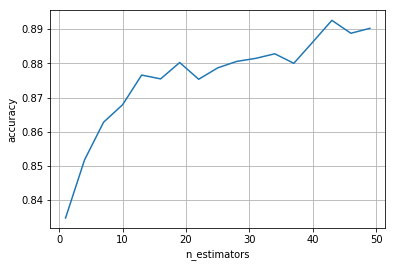

In [145]:
# plot test scores and n_estimators
# plot
plt.plot(estimators, abc_scores)
plt.xlabel('n_estimators')
plt.ylabel('accuracy')
plt.grid()
# plt.ylim([0.85, 1])
plt.show()

In [146]:
from sklearn.ensemble import AdaBoostClassifier
shallow_tree_final = DecisionTreeClassifier(max_depth=20,random_state=101)
ADB = AdaBoostClassifier(base_estimator=shallow_tree_final,n_estimators=43)
ADB.fit(X_sm_pca,y_sm)
ada_pred = ADB.predict(X_test_pca)
AllMeasure(y_test,ada_pred)

   accuracy   f1score       fpr  neg_pred_val  pos_pred_val  precision  \
0  0.900344  0.480602  0.073614      0.964138      0.404483   0.404483   

     recall  sensitivity  specificity  
0  0.592011     0.592011     0.926386  


[[7689  611]
 [ 286  415]]


              precision    recall  f1-score   support

           0       0.96      0.93      0.94      8300
           1       0.40      0.59      0.48       701

    accuracy                           0.90      9001
   macro avg       0.68      0.76      0.71      9001
weighted avg       0.92      0.90      0.91      9001



In [1]:
# from sklearn.ensemble import GradientBoostingClassifier
# parameters = {
#     "loss":["deviance"],
#     "learning_rate": [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2],
#     "min_samples_split": np.linspace(0.1, 0.5, 12),
#     "min_samples_leaf": np.linspace(0.1, 0.5, 12),
#     "max_depth":[3,5,8],
#     "max_features":["log2","sqrt"],
#     "criterion": ["friedman_mse",  "mae"],
#     "subsample":[0.5, 0.618, 0.8, 0.85, 0.9, 0.95, 1.0],
#     "n_estimators":[10]
#     }
# GBoosting = GradientBoostingClassifier(max_depth=20, n_estimators=100)
# grid_search_GBC = GridSearchCV(GBoosting, 
#                                cv = 5,
#                                param_grid=parameters, 
#                                scoring = 'f1', 
#                                return_train_score=True,                         
#                                verbose = 1,n_jobs=3)

# grid_search_GBC.fit(X_sm_pca,y_sm)

#### Now lets select our final model based on sensitivity and f1_score

| Model | Sensitivity | F1_Score |
| --- | --- | --- |
| Logistic Regression | 0.808845 | 0.34 |
| DecisionTree | 0.718973 | 0.40 |
| RandomForest | 0.747504 | 0.44 |
| AdaBoost | 0.592011 | 0.48 |

#### Based on the table above i am selecting RandomForest as my final model

In [148]:
rforest_pred = rfc.predict(X_test_pca)
AllMeasure(y_test,rforest_pred)

   accuracy   f1score       fpr  neg_pred_val  pos_pred_val  precision  \
0   0.85435  0.444256  0.136627      0.975895      0.316043   0.316043   

     recall  sensitivity  specificity  
0  0.747504     0.747504     0.863373  


[[7166 1134]
 [ 177  524]]


              precision    recall  f1-score   support

           0       0.98      0.86      0.92      8300
           1       0.32      0.75      0.44       701

    accuracy                           0.85      9001
   macro avg       0.65      0.81      0.68      9001
weighted avg       0.92      0.85      0.88      9001



### Identifying important predictor attributes which help the business understand indicators of churn

In [92]:
import statsmodels.api as sm

In [93]:
HVC.head()

,mobile_number,circle_id,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_8,std_og_t2f_mou_8,std_og_mou_8,isd_og_mou_8,spl_og_mou_8,og_others_8,total_og_mou_8,loc_ic_t2t_mou_8,loc_ic_t2m_mou_8,loc_ic_t2f_mou_8,loc_ic_mou_8,std_ic_t2t_mou_8,std_ic_t2m_mou_8,std_ic_t2f_mou_8,std_ic_mou_8,total_ic_mou_8,spl_ic_mou_8,isd_ic_mou_8,total_rech_num_8,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,max_rech_data_8,vol_2g_mb_8,vol_3g_mb_8,monthly_2g_8,sachet_2g_8,monthly_3g_8,sachet_3g_8,aon,aug_vbc_3g,sep_vbc_3g,tot_rech_amt_data_6,tot_rech_amt_data_7,tot_rech_amt_data_8,total_avg_rech_amnt,churn,total_rech_amt_good_phase,total_rech_amt_data_good_phase,max_rech_amt_good_phase,avg_of_max_rech_data_good_phase,total_rech_num_good_phase,vol_2g_mb_good_phase,vol_3g_mb_good_phase,monthly_2g_good_phase,monthly_3g_good_phase,3g_volume_based_cost,spl_og_mou_good_phase,isd_og_mou_good_phase,roam_og_mou_good_phase,std_og_t2m_mou_good_phase,std_og_t2t_mou_good_phase,std_og_t2f_mou_good_phase,loc_og_t2m_mou_good_phase,loc_og_t2t_mou_good_phase,loc_og_t2f_mou_good_phase,loc_og_t2c_mou_good_phase,loc_og_mou_good_phase,std_og_mou_good_phase,total_og_mou_good_phase,spl_ic_mou_good_phase,isd_ic_mou_good_phase,roam_ic_mou_good_phase,std_ic_t2m_mou_good_phase,std_ic_t2t_mou_good_phase,std_ic_t2f_mou_good_phase,loc_ic_t2m_mou_good_phase,loc_ic_t2t_mou_good_phase,loc_ic_t2f_mou_good_phase,loc_ic_t2c_mou_good_phase,std_ic_mou_good_phase,total_ic_mou_good_phase,og_others_good_phase,ic_others_good_phase,offnet_mou_good_phase,onnet_mou_good_phase,sachet_2g_good_phase,sachet_3g_good_phase,last_day_of_month_6,last_day_of_month_7,last_day_of_month_8,day_of_last_rech_6,day_of_last_rech_7,day_of_last_rech_8,arpu_good_phase
0,7000842753,109,213.803,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.16,4.13,1.15,5.44,0.00,0.00,0.00,0.00,5.44,0.0,0.00,2,252,252,252,252,252.0,5.75,109.61,0,0,1,0,968,30.40,3.58,252.0,252.0,252.0,279.5,1,307.0,252.0,252.0,252.0,3.5,15.725,117.165,0.0,1.0,50.600,0.00,0.000,0.000,0.000,0.000,0.00,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.00,0.0,0.0,30,31.0,31.0,21.0,16.0,8.0,206.1005
7,7000701601,109,3171.480,52.29,325.91,31.64,38.06,40.28,162.28,53.23,0.00,255.79,12.01,49.14,16.68,77.84,10.01,6.50,0.0,350.16,27.31,121.19,39.53,188.04,30.39,141.33,22.21,193.94,428.74,0.0,31.59,7,1580,0,0,779,0.0,0.00,0.00,0,0,0,0,802,57.74,0.00,0.0,0.0,0.0,592.5,1,1185.0,0.0,1185.0,0.0,5.0,0.000,0.000,0.0,0.0,19.060,2.25,0.090,18.165,40.825,13.795,13.37,378.005,41.385,58.635,0.0,478.035,68.000,548.385,0.105,8.295,24.86,109.215,24.360,43.215,219.525,45.200,126.810,391.555,176.810,592.250,0.0,15.465,510.295,56.26,0.0,0.0,30,31.0,31.0,27.0,25.0,26.0,1209.5150
8,7001524846,109,137.362,35.08,136.48,0.00,0.00,12.49,50.54,0.00,7.15,63.04,22.58,75.69,0.00,98.28,0.00,10.23,0.0,171.56,0.31,15.48,0.00,15.79,0.10,0.65,0.00,0.75,16.54,0.0,0.00,14,30,50,0,10,23.0,0.03,11.94,0,3,0,0,315,21.03,0.00,0.0,354.0,207.0,348.0,0,519.0,177.0,122.0,77.0,20.0,178.000,375.475,0.5,0.0,516.405,0.00,0.000,0.000,11.865,124.995,0.00,75.770,257.360,0.000,0.0,333.135,136.870,470.010,0.000,0.000,0.00,13.255,0.290,0.000,35.780,16.840,0.000,52.630,13.545,66.175,0.0,0.000,87.645,382.36,0.5,0.0,30,31.0,31.0,25.0,31.0,30.0,435.4720
21,7002124215,109,637.760,85.14,983.39,0.00,0.00,23.34,104.81,1.58,0.00,129.74,61.79,876.99,0.00,938.79,0.00,0.00,0.0,1068.54,19.54,129.16,10.39,159.11,0.18,101.74,0.00,101.93,261.04,0.0,0.00,27,50,30,20,50,0.0,0.00,0.00,0,0,0,0,720,0.00,0.00,0.0,0.0,0.0,320.0,0,640.0,0.0,50.0,0.0,24.0,0.000,0.000,0.0,0.0,0.000,0.00,0.000,0.000,737.050,111.935,0.00,89.870,5.320,0.375,0.0,95.565,848.990,944.565,0.000,0.000,0.00,52.960,10.020,0.000,96.430,6.335,3.725,106.505,62.985,169.490,0.0,0.000,827.305,117.26,0.0,0.0,

In [94]:
HVC = HVC.drop(['mobile_number','circle_id'],axis='columns')

In [95]:
y = HVC.pop('churn')
X = HVC

In [96]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7,test_size=0.3,random_state=42)

In [97]:
cols = list(X_train.columns)
scale = StandardScaler()
X_train[cols] = scale.fit_transform(X_train[cols])
X_test[cols] = scale.transform(X_test[cols])

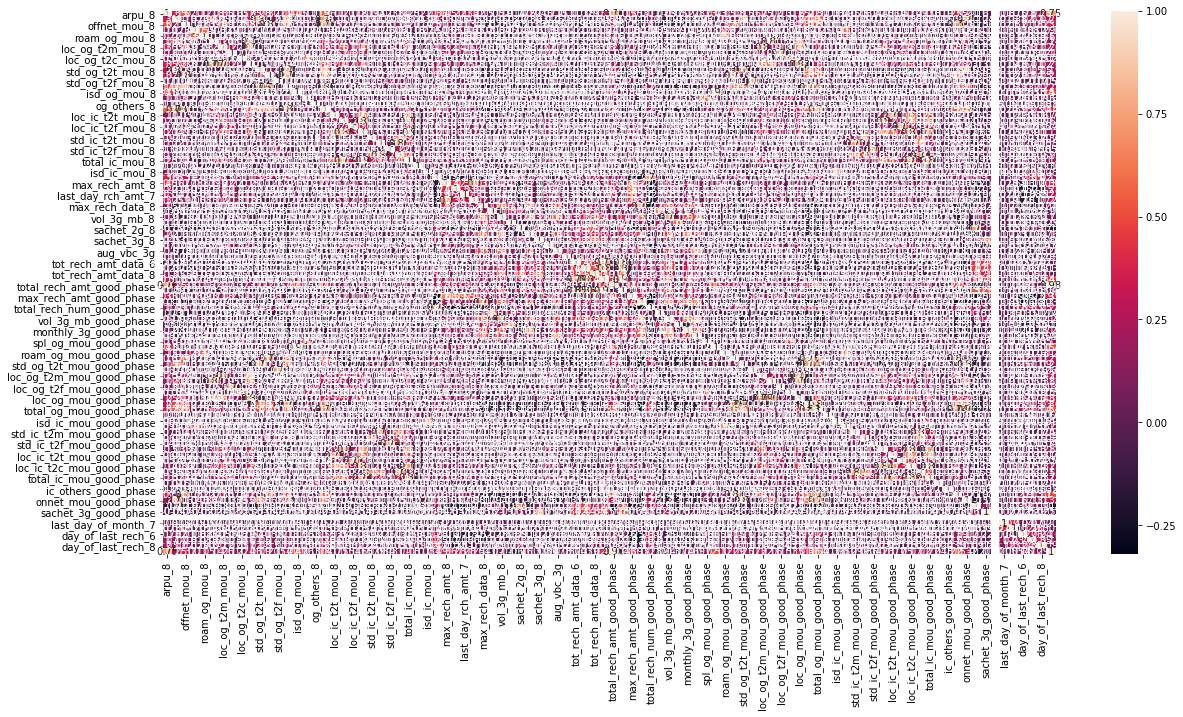

In [98]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(HVC.corr(),annot = True)
plt.show()

In [99]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                21000
Model:                            GLM   Df Residuals:                    20906
Model Family:                Binomial   Df Model:                           93
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 19 Aug 2019   Deviance:                          nan
Time:                        21:24:33   Pearson chi2:                 7.56e+18
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                            -6.44e+14   4.63e+05  -1.39e+09      0.000   -6.44e+14   -6.44e+14
arpu_8                          -2.153e+13   1.38e+06  -1.56e+07      0.000   -2.15e+13   -2.15e+13
onnet_mou_8                     -5.197e+14   2.79e+07  -1.86e+07      0.000    -5.2e+14    -5.2e+14
offnet_mou_8                    -7.134e+14    2.9e+07  -2.46e+07      0.000   -7.13e+14   -7.13e+14
roam_ic_mou_8                   -2.386e+13   6.63e+05   -3.6e+07      0.000   -2.39e+13   -2.39e+13
roam_og_mou_8                     1.71e+14   6.73e+06   2.54e+07      0.000    1.71e+14    1.71e+14
loc_og_t2t_mou_8                 1.107e+18   1.81e+10   6.13e+07      0.000    1.11e+18    1.11e+18
loc_og_t2m_mou_8                 1.186e+18   1.94e+10   6.13e+07      0.000    1.19e+18    1.19e+18
loc_og_t2f_mou_8                 1.003e+17   1.64e+09   6.13e+07      0.000       1e+17       1e+17
loc_og_t2c_mou_8                 2.381e+13   5.96e+05   3.99e+07      0.000    2.38e+13    2.38e+13
loc_og_mou_8                    -1.606e+18   3.92e+10  -4.09e+07      0.000   -1.61e+18   -1.61e+18
std_og_t2t_mou_8                -4.186e+17   4.36e+10   -9.6e+06      0.000   -4.19e+17   -4.19e+17
std_og_t2m_mou_8                 -4.38e+17   4.56e+10   -9.6e+06      0.000   -4.38e+17   -4.38e+17
std_og_t2f_mou_8                -1.151e+16    1.2e+09  -9.62e+06      0.000   -1.15e+16   -1.15e+16
std_og_mou_8                     1.008e+18   8.09e+10   1.25e+07      0.000    1.01e+18    1.01e+18
isd_og_mou_8                     3.006e+16    4.1e+09   7.34e+06      0.000    3.01e+16    3.01e+16
spl_og_mou_8                     1.221e+16   1.67e+09   7.32e+06      0.000    1.22e+16    1.22e+16
og_others_8                      2.301e+15   3.13e+08   7.36e+06      0.000     2.3e+15     2.3e+15
total_og_mou_8                  -4.131e+17   5.62e+10  -7.34e+06      0.000   -4.13e+17   -4.13e+17
loc_ic_t2t_mou_8                 1.153e+18   1.27e+10    9.1e+07      0.000    1.15e+18    1.15e+18
loc_ic_t2m_mou_8                 1.571e+18   1.73e+10    9.1e+07      0.000    1.57e+18    1.57e+18
loc_ic_t2f_mou_8                 3.128e+17   3.44e+09    9.1e+07      0.000    3.13e+17    3.13e+17
loc_ic_mou_8                    -2.244e+18   2.47e+10   -9.1e+07      0.000   -2.24e+18   -2.24e+18
std_ic_t2t_mou_8                 1.379e+17    7.5e+09   1.84e+07      0.000    1.38e+17    1.38e+17
std_ic_t2m_mou_8                 1.828e+17   9.93e+09   1.84e+07      0.000    1.83e+17    1.83e+17
std_ic_t2f_mou_8                  4.26e+16   2.32e+09   1.83e+07      0.000    4.26e+16    4.26e+16
std_ic_mou_8                    -2.538e+17   1.38e+10  -1.84e+07      0.000   -2.54e+17   -2.54e+17
total_ic_mou_8                  -1.388e+14   1.93e+07  -7.21e+06      0.000   -1.39

### Feature Selection Using RFE

In [100]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [101]:
rfe.support_

array([False, False,  True, False, False, False, False, False, False,
        True, False, False, False, False,  True, False, False, False,
       False,  True, False,  True, False, False, False, False,  True,
       False, False, False, False, False, False,  True, False, False,
       False,  True,  True,  True, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False,  True,  True])

In [102]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('arpu_8', False, 34),
 ('onnet_mou_8', False, 79),
 ('offnet_mou_8', True, 1),
 ('roam_ic_mou_8', False, 68),
 ('roam_og_mou_8', False, 35),
 ('loc_og_t2t_mou_8', False, 22),
 ('loc_og_t2m_mou_8', False, 73),
 ('loc_og_t2f_mou_8', False, 60),
 ('loc_og_t2c_mou_8', False, 42),
 ('loc_og_mou_8', True, 1),
 ('std_og_t2t_mou_8', False, 4),
 ('std_og_t2m_mou_8', False, 48),
 ('std_og_t2f_mou_8', False, 16),
 ('std_og_mou_8', False, 66),
 ('isd_og_mou_8', True, 1),
 ('spl_og_mou_8', False, 32),
 ('og_others_8', False, 49),
 ('total_og_mou_8', False, 47),
 ('loc_ic_t2t_mou_8', False, 2),
 ('loc_ic_t2m_mou_8', True, 1),
 ('loc_ic_t2f_mou_8', False, 3),
 ('loc_ic_mou_8', True, 1),
 ('std_ic_t2t_mou_8', False, 11),
 ('std_ic_t2m_mou_8', False, 38),
 ('std_ic_t2f_mou_8', False, 17),
 ('std_ic_mou_8', False, 37),
 ('total_ic_mou_8', True, 1),
 ('spl_ic_mou_8', False, 5),
 ('isd_ic_mou_8', False, 67),
 ('total_rech_num_8', False, 7),
 ('max_rech_amt_8', False, 33),
 ('last_day_rch_amt_6', False, 

In [103]:
col = X_train.columns[rfe.support_]

In [104]:
X_train.columns[~rfe.support_]

Index(['arpu_8', 'onnet_mou_8', 'roam_ic_mou_8', 'roam_og_mou_8',
       'loc_og_t2t_mou_8', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_8',
       'loc_og_t2c_mou_8', 'std_og_t2t_mou_8', 'std_og_t2m_mou_8',
       'std_og_t2f_mou_8', 'std_og_mou_8', 'spl_og_mou_8', 'og_others_8',
       'total_og_mou_8', 'loc_ic_t2t_mou_8', 'loc_ic_t2f_mou_8',
       'std_ic_t2t_mou_8', 'std_ic_t2m_mou_8', 'std_ic_t2f_mou_8',
       'std_ic_mou_8', 'spl_ic_mou_8', 'isd_ic_mou_8', 'total_rech_num_8',
       'max_rech_amt_8', 'last_day_rch_amt_6', 'last_day_rch_amt_7',
       'max_rech_data_8', 'vol_2g_mb_8', 'vol_3g_mb_8', 'sachet_3g_8', 'aon',
       'aug_vbc_3g', 'tot_rech_amt_data_6', 'tot_rech_amt_data_7',
       'tot_rech_amt_data_8', 'total_avg_rech_amnt',
       'total_rech_amt_good_phase', 'total_rech_amt_data_good_phase',
       'max_rech_amt_good_phase', 'avg_of_max_rech_data_good_phase',
       'total_rech_num_good_phase', 'vol_2g_mb_good_phase',
       'vol_3g_mb_good_phase', 'monthly_2g_good_phase

##### Assessing the model with StatsModel/

In [105]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                21000
Model:                            GLM   Df Residuals:                    20984
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3948.2
Date:                Mon, 19 Aug 2019   Deviance:                       7896.3
Time:                        21:25:57   Pearson chi2:                 2.56e+06
No. Iterations:                    23                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        -4.2170     65.956     -0.064      0.949    -133.488     125.054
offnet_mou_8                 -0.3818      0.053     -7.226      0.000      -0.485      -0.278
loc_og_mou_8                 -0.4757      0.106     -4.469      0.000      -0.684      -0.267
isd_og_mou_8                 -0.4985      0.048    -10.438      0.000      -0.592      -0.405
loc_ic_t2m_mou_8             -0.0189      0.317     -0.060      0.952      -0.640       0.602
loc_ic_mou_8                 -2.3803      0.382     -6.225      0.000      -3.130      -1.631
total_ic_mou_8               -0.6107      0.165     -3.701      0.000      -0.934      -0.287
last_day_rch_amt_8           -0.4942      0.053     -9.389      0.000      -0.597      -0.391
monthly_2g_8                 -0.6257      0.066     -9.550      0.000      -0.754      -0.497
sachet_2g_8                  -0.6885      0.069     -9.919      0.000      -0.825      -0.552
monthly_3g_8                 -0.5367      0.061     -8.769      0.000      -0.657      -0.417
sep_vbc_3g                   -1.1114      0.275     -4.048      0.000      -1.650      -0.573
loc_ic_t2c_mou_good_phase     0.5615      0.064      8.800      0.000       0.436       0.687
last_day_of_month_8          -1.7491    881.163     -0.002      0.998   -1728.797    1725.299
day_of_last_rech_8           -0.3861      0.023    -16.438      0.000      -0.432      -0.340
arpu_good_phase               0.5812      0.040     14.507      0.000       0.503       0.660
=============================================================================================
"""

In [106]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

65002    0.306930
67088    0.043680
36410    0.016102
90870    0.081442
50581    0.006783
3165     0.188709
87443    0.080858
43891    0.008537
90367    0.011032
44566    0.121450
dtype: float64

In [107]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.30693048, 0.04367991, 0.01610155, 0.08144191, 0.00678255,
       0.18870865, 0.08085776, 0.00853688, 0.0110325 , 0.12144963])

In [108]:
y_train_pred_final = pd.DataFrame({'Churn':y_train.values, 'Churn_Prob':y_train_pred})
y_train_pred_final['CustID'] = y_train.index
y_train_pred_final.head()

,Churn,Churn_Prob,CustID
0,1,0.306930,65002
1,0,0.043680,67088
2,0,0.016102,36410
3,0,0.081442,90870
4,0,0.006783,50581


In [109]:
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted
0,1,0.306930,65002,0
1,0,0.043680,67088,0
2,0,0.016102,36410,0
3,0,0.081442,90870,0
4,0,0.006783,50581,0


In [110]:
from sklearn import metrics

In [111]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
print(confusion)

[[19066   194]
 [ 1321   419]]


In [112]:
from sklearn.metrics import classification_report
print(classification_report(y_train_pred_final.Churn,y_train_pred_final.predicted))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96     19260
           1       0.68      0.24      0.36      1740

    accuracy                           0.93     21000
   macro avg       0.81      0.62      0.66     21000
weighted avg       0.91      0.93      0.91     21000



### Checking VIF

In [113]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [114]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,loc_ic_mou_8,10.48
5,total_ic_mou_8,5.43
3,loc_ic_t2m_mou_8,3.66
11,loc_ic_t2c_mou_good_phase,3.23
14,arpu_good_phase,1.77
1,loc_og_mou_8,1.50
2,isd_og_mou_8,1.40
0,offnet_mou_8,1.38
13,day_of_last_rech_8,1.22
6,last_day_rch_amt_8,1.14


There are a few variables with high VIF. It's best to drop these variables as they aren't helping much with prediction and unnecessarily making the model complex.

In [115]:
col = col.drop('loc_ic_mou_8', 1)
col

Index(['offnet_mou_8', 'loc_og_mou_8', 'isd_og_mou_8', 'loc_ic_t2m_mou_8',
       'total_ic_mou_8', 'last_day_rch_amt_8', 'monthly_2g_8', 'sachet_2g_8',
       'monthly_3g_8', 'sep_vbc_3g', 'loc_ic_t2c_mou_good_phase',
       'last_day_of_month_8', 'day_of_last_rech_8', 'arpu_good_phase'],
      dtype='object')

In [116]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                21000
Model:                            GLM   Df Residuals:                    20985
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3970.1
Date:                Mon, 19 Aug 2019   Deviance:                       7940.2
Time:                        21:27:03   Pearson chi2:                 1.13e+07
No. Iterations:                    23                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        -4.1478     66.093     -0.063      0.950    -133.688     125.393
offnet_mou_8                 -0.3525      0.052     -6.828      0.000      -0.454      -0.251
loc_og_mou_8                 -0.6474      0.110     -5.867      0.000      -0.864      -0.431
isd_og_mou_8                 -0.4969      0.047    -10.500      0.000      -0.590      -0.404
loc_ic_t2m_mou_8             -1.3445      0.205     -6.571      0.000      -1.746      -0.943
total_ic_mou_8               -1.3633      0.169     -8.063      0.000      -1.695      -1.032
last_day_rch_amt_8           -0.5037      0.053     -9.527      0.000      -0.607      -0.400
monthly_2g_8                 -0.6363      0.066     -9.702      0.000      -0.765      -0.508
sachet_2g_8                  -0.6917      0.069     -9.977      0.000      -0.828      -0.556
monthly_3g_8                 -0.5433      0.061     -8.872      0.000      -0.663      -0.423
sep_vbc_3g                   -1.1194      0.276     -4.057      0.000      -1.660      -0.579
loc_ic_t2c_mou_good_phase     0.4650      0.059      7.831      0.000       0.349       0.581
last_day_of_month_8          -1.7523    883.000     -0.002      0.998   -1732.400    1728.896
day_of_last_rech_8           -0.3853      0.023    -16.478      0.000      -0.431      -0.339
arpu_good_phase               0.5942      0.040     14.973      0.000       0.516       0.672
=============================================================================================
"""

In [117]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [118]:
y_train_pred[:10]

array([0.30703886, 0.04103535, 0.01505671, 0.0872373 , 0.0060186 ,
       0.18941337, 0.08180976, 0.00873744, 0.01325549, 0.13465262])

In [119]:
y_train_pred_final['Churn_Prob'] = y_train_pred

In [120]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted
0,1,0.307039,65002,0
1,0,0.041035,67088,0
2,0,0.015057,36410,0
3,0,0.087237,90870,0
4,0,0.006019,50581,0


In [121]:
from sklearn.metrics import classification_report
print(classification_report(y_train_pred_final.Churn,y_train_pred_final.predicted))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96     19260
           1       0.70      0.24      0.35      1740

    accuracy                           0.93     21000
   macro avg       0.82      0.61      0.66     21000
weighted avg       0.92      0.93      0.91     21000



The accuracy is still practically the same.

In [122]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,total_ic_mou_8,3.20
3,loc_ic_t2m_mou_8,2.77
10,loc_ic_t2c_mou_good_phase,2.45
13,arpu_good_phase,1.75
1,loc_og_mou_8,1.47
2,isd_og_mou_8,1.40
0,offnet_mou_8,1.37
12,day_of_last_rech_8,1.22
5,last_day_rch_amt_8,1.13
7,sachet_2g_8,1.11


In [123]:
col = col.drop('total_ic_mou_8', 1)
col

Index(['offnet_mou_8', 'loc_og_mou_8', 'isd_og_mou_8', 'loc_ic_t2m_mou_8',
       'last_day_rch_amt_8', 'monthly_2g_8', 'sachet_2g_8', 'monthly_3g_8',
       'sep_vbc_3g', 'loc_ic_t2c_mou_good_phase', 'last_day_of_month_8',
       'day_of_last_rech_8', 'arpu_good_phase'],
      dtype='object')

In [124]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                21000
Model:                            GLM   Df Residuals:                    20986
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4026.9
Date:                Mon, 19 Aug 2019   Deviance:                       8053.8
Time:                        21:27:35   Pearson chi2:                 2.30e+08
No. Iterations:                    23                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        -4.1511     66.448     -0.062      0.950    -134.387     126.085
offnet_mou_8                 -0.4138      0.052     -7.884      0.000      -0.517      -0.311
loc_og_mou_8                 -0.8194      0.115     -7.106      0.000      -1.045      -0.593
isd_og_mou_8                 -0.5415      0.049    -11.165      0.000      -0.637      -0.446
loc_ic_t2m_mou_8             -2.3367      0.156    -14.932      0.000      -2.643      -2.030
last_day_rch_amt_8           -0.5447      0.053    -10.337      0.000      -0.648      -0.441
monthly_2g_8                 -0.6555      0.066     -9.993      0.000      -0.784      -0.527
sachet_2g_8                  -0.7038      0.070    -10.108      0.000      -0.840      -0.567
monthly_3g_8                 -0.5595      0.061     -9.172      0.000      -0.679      -0.440
sep_vbc_3g                   -1.1652      0.279     -4.169      0.000      -1.713      -0.617
loc_ic_t2c_mou_good_phase     0.2484      0.042      5.949      0.000       0.167       0.330
last_day_of_month_8          -1.7592    887.738     -0.002      0.998   -1741.694    1738.176
day_of_last_rech_8           -0.3995      0.023    -17.227      0.000      -0.445      -0.354
arpu_good_phase               0.6063      0.039     15.583      0.000       0.530       0.683
=============================================================================================
"""

In [125]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [126]:
y_train_pred[:10]

array([0.29404572, 0.03326568, 0.01334217, 0.07013031, 0.00567966,
       0.17278459, 0.06939291, 0.00791003, 0.0133103 , 0.13994286])

In [127]:
y_train_pred_final['Churn_Prob'] = y_train_pred

In [128]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted
0,1,0.294046,65002,0
1,0,0.033266,67088,0
2,0,0.013342,36410,0
3,0,0.070130,90870,0
4,0,0.005680,50581,0


In [129]:
from sklearn.metrics import classification_report
print(classification_report(y_train_pred_final.Churn,y_train_pred_final.predicted))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96     19260
           1       0.70      0.23      0.34      1740

    accuracy                           0.93     21000
   macro avg       0.82      0.61      0.65     21000
weighted avg       0.91      0.93      0.91     21000



In [130]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,loc_ic_t2m_mou_8,2.03
9,loc_ic_t2c_mou_good_phase,1.98
12,arpu_good_phase,1.75
1,loc_og_mou_8,1.46
2,isd_og_mou_8,1.40
0,offnet_mou_8,1.37
11,day_of_last_rech_8,1.22
4,last_day_rch_amt_8,1.13
6,sachet_2g_8,1.11
10,last_day_of_month_8,1.11


All variables have a good value of VIF. So we need not drop any more variables and we can proceed with making predictions using this model only

In [131]:
from sklearn.metrics import classification_report
print(classification_report(y_train_pred_final.Churn,y_train_pred_final.predicted))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96     19260
           1       0.70      0.23      0.34      1740

    accuracy                           0.93     21000
   macro avg       0.82      0.61      0.65     21000
weighted avg       0.91      0.93      0.91     21000



####  Plotting ROC

In [132]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [133]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Churn, y_train_pred_final.Churn_Prob, drop_intermediate = False )

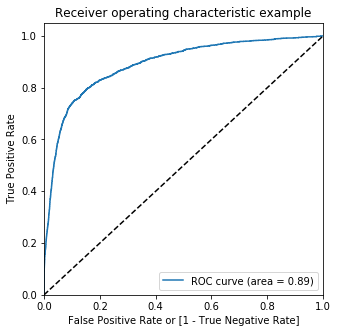

In [134]:
draw_roc(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)

####  Optimal Cutoff Point

In [135]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.294046,65002,0,1,1,1,0,0,0,0,0,0,0
1,0,0.033266,67088,0,1,0,0,0,0,0,0,0,0,0
2,0,0.013342,36410,0,1,0,0,0,0,0,0,0,0,0
3,0,0.070130,90870,0,1,0,0,0,0,0,0,0,0,0
4,0,0.005680,50581,0,1,0,0,0,0,0,0,0,0,0


In [136]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.082857  1.000000  0.000000
0.1   0.1  0.807714  0.824713  0.806179
0.2   0.2  0.908381  0.677586  0.929232
0.3   0.3  0.927238  0.468966  0.968640
0.4   0.4  0.927048  0.309770  0.982814
0.5   0.5  0.927762  0.225862  0.991173
0.6   0.6  0.927143  0.166092  0.995898
0.7   0.7  0.925667  0.117816  0.998650
0.8   0.8  0.924048  0.085057  0.999844
0.9   0.9  0.923286  0.074713  0.999948


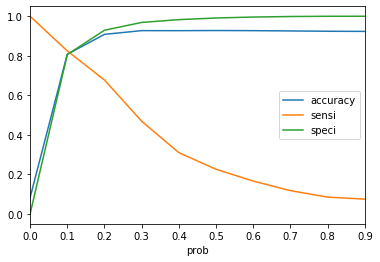

In [137]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()


#### From the curve above, 0.1 is the optimum point to take it as a cutoff probability.


In [138]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.1 else 0)

y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.294046,65002,0,1,1,1,0,0,0,0,0,0,0,1
1,0,0.033266,67088,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.013342,36410,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.070130,90870,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.005680,50581,0,1,0,0,0,0,0,0,0,0,0,0


In [139]:
from sklearn.metrics import classification_report
print(classification_report(y_train_pred_final.Churn,y_train_pred_final.predicted))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96     19260
           1       0.70      0.23      0.34      1740

    accuracy                           0.93     21000
   macro avg       0.82      0.61      0.65     21000
weighted avg       0.91      0.93      0.91     21000



## Below are the importaint variable 

#### loc_ic_t2m_mou_8
#### loc_ic_t2c_mou_good_phase
#### arpu_good_phase
#### loc_og_mou_8
#### isd_og_mou_8
##### offnet_mou_8
#### day_of_last_rech_8
#### last_day_rch_amt_8
#### sachet_2g_8
#### last_day_of_month_8
#### monthly_3g_8
#### monthly_2g_8
#### sep_vbc_3g

### Recommendations to reduce Customer Churn
##### Based on modeling an EDA following are our recommendations to reduce customer churn:

1) Tariff should be reduced for data services ,a better 2G area coverage where 3G is not available.

2) We should focus on expansion of our existing 3G network to areas where it is currently not present.

3) We should focus on lower or nill roaming charges so that customers do not seek local network when travelling to non local   network area

4) Customized plans : We should be continously be monitoring customer behaviour to make them stick to our netwrk, for example customised plans for those who have high mou etc.

5) Focus on Privilege Customers : We should be giving offers and customised plans to c